# Main Goals:
1. Make sure columns are the appropriate data type
2. Identify columns with any null values or duplicated values
3. Remove columns that I believe are not necessary for analysis
4. Check for linearity using correlation coeafficients
5. Remove outliers
6. Checck for normality using qq plot and distplot
7. Select features for modeling
8. One hot encode anything that needs to be

# Questions to consider:
1. What features in this dataset can be good predictors for the price of a home?
2. What features in this dataset would decrease the price of a home and which ones would increase the price of a home?
3. Does location of a home matter in King County?

# Data Overview

In [96]:
# import any necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [97]:
# Load dataset and view contents
king = pd.read_csv("../data/kc_house_data.csv")
king.head(3)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  

[3 rows x 25 columns]

In [98]:
# View the columns in the king dataframe
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [99]:
# View datatypes in each column 
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

**Observations:**
1. date, yr_built, yr_renovated should be in datetime format

# Deal with Duplicates and Null values/empty values

In [100]:
# Look at the unique identifier column and see if every record is a unique home 
print(king['id'].nunique())
#get sum of duplicates
king['id'].duplicated().sum()

30154


1

It seems that there is only 1 duplicate record so now lets drop that record.

In [101]:
#drop duplicates and only keep the most current data
king = king.sort_values('id').drop_duplicates(subset = 'id', keep = 'first')

#get sum of duplicates
king['id'].duplicated().sum()

0

Now that duplicates have been removed lets start removing any null values or missing values. 

In [102]:
#check for null values
king.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [103]:
# Just based off know the size of the dataset 32 values max is a very small percentage of data. It would be appropriate to drop the rows. 
king.dropna(axis=0, inplace=True)

#check for null values to make sure
king.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [104]:
# Since we sorted it already and took care of the duplicates lets drop our identifiers column since it is no longer needed.
king.drop(labels='id', axis=1, inplace=True)

In [105]:
for col in king.columns:
    print(king.groupby(by = col)[col].count().sort_values(ascending = False))

date
7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
1/16/2022       1
6/9/2022        1
12/25/2021      1
12/26/2021      1
12/5/2021       1
Name: date, Length: 365, dtype: int64
price
650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
1100100.0      1
1100050.0      1
1099999.0      1
1099700.0      1
27360.0        1
Name: price, Length: 5199, dtype: int64
bedrooms
3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64
bathrooms
2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.0       12
7.5       12
0.5        5
8.0        2
9.5        2
10.0       1
8.5        1
10.5       1
Name: bathrooms, dtype: int64
sqft_living
1250   

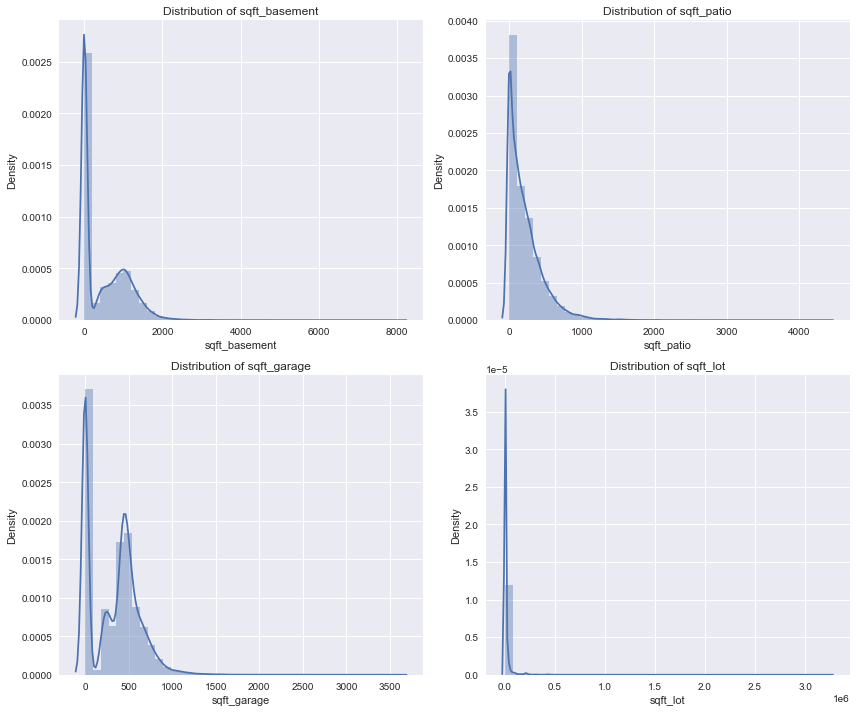

In [106]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution plots on subplots
sns.distplot(king['sqft_basement'], bins=40, kde=True, ax=axs[0, 0])
sns.distplot(king['sqft_patio'], bins=40, kde=True, ax=axs[0, 1])
sns.distplot(king['sqft_garage'], bins=40, kde=True, ax=axs[1, 0])
sns.distplot(king['sqft_lot'], bins=40, kde=True, ax=axs[1, 1])

# Set titles for each subplot
axs[0, 0].set_title('Distribution of sqft_basement')
axs[0, 1].set_title('Distribution of sqft_patio')
axs[1, 0].set_title('Distribution of sqft_garage')
axs[1, 1].set_title('Distribution of sqft_lot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [107]:
# Count the number of zero values in each column
num_zeros_sqft_basement = (king['sqft_basement'] == 0).sum()
num_zeros_sqft_patio = (king['sqft_patio'] == 0).sum()
num_zeros_sqft_garage = (king['sqft_garage'] == 0).sum()
num_zeros_sqft_lot = (king['sqft_lot'] == 0).sum()

# Print the results
print("Number of zero values in sqft_basement:", num_zeros_sqft_basement)
print("Number of zero values in sqft_patio:", num_zeros_sqft_patio)
print("Number of zero values in sqft_garage:", num_zeros_sqft_garage)
print("Number of zero values in sqft_lot:", num_zeros_sqft_lot)

Number of zero values in sqft_basement: 15434
Number of zero values in sqft_patio: 6746
Number of zero values in sqft_garage: 9978
Number of zero values in sqft_lot: 0


In [108]:
# Assuming 'king' is your DataFrame containing the data

# View the value counts for each column
value_counts_sqft_basement = king['sqft_basement'].value_counts()
value_counts_sqft_patio = king['sqft_patio'].value_counts()
value_counts_sqft_garage = king['sqft_garage'].value_counts()
value_counts_sqft_lot = king['sqft_lot'].value_counts()

# Print the results
print("Value counts for sqft_basement:\n", value_counts_sqft_basement)
print("\nValue counts for sqft_patio:\n", value_counts_sqft_patio)
print("\nValue counts for sqft_garage:\n", value_counts_sqft_garage)
print("\nValue counts for sqft_lot:\n", value_counts_sqft_lot)


Value counts for sqft_basement:
 0       15434
1010      257
1100      224
1060      219
1200      192
        ...  
3350        1
1079        1
3110        1
2870        1
3590        1
Name: sqft_basement, Length: 459, dtype: int64

Value counts for sqft_patio:
 0       6746
100      906
80       886
60       858
40       839
        ... 
445        1
182        1
509        1
102        1
3550       1
Name: sqft_patio, Length: 526, dtype: int64

Value counts for sqft_garage:
 0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64

Value counts for sqft_lot:
 5000      486
6000      402
4000      374
7200      302
7500      181
         ... 
12895       1
23138       1
387684      1
617         1
4098        1
Name: sqft_lot, Length: 12223, dtype: int64


**Observations:** 
* We can see how sqft_patio, sqft_garage, and sqft_basement have missing values placed as zero. 
* We can simply drop 'view' since this columns suggests if the property was viewed which is not useful for this analysis.
* Since Basement has over half the data missing, we can instead just create a column that suggests if a home has a basement instead. 
* Garage, patio, and lot should be treatede as categories since there is not a lot of missing values. It seems that these are discrete values as not every home has a unique size.
* Treat patio
* The year renovated has a lot of zero values as well meaning not every home was renovated. Best to drop that column entirely. 

In [109]:
# Let 1 = True if it has a feature and 0 = False if it does not 
king['basement'] = king['sqft_basement'].map(lambda x: 0 if x == 0 else 1)
# Drop the original columns 
king.drop(labels=['sqft_basement', 'yr_renovated', 'view'], axis = 1, inplace = True)

# Checking for other sources of err in data (Correct datatypes, outliers) 

In [110]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30110 non-null  object 
 1   price         30110 non-null  float64
 2   bedrooms      30110 non-null  int64  
 3   bathrooms     30110 non-null  float64
 4   sqft_living   30110 non-null  int64  
 5   sqft_lot      30110 non-null  int64  
 6   floors        30110 non-null  float64
 7   waterfront    30110 non-null  object 
 8   greenbelt     30110 non-null  object 
 9   nuisance      30110 non-null  object 
 10  condition     30110 non-null  object 
 11  grade         30110 non-null  object 
 12  heat_source   30110 non-null  object 
 13  sewer_system  30110 non-null  object 
 14  sqft_above    30110 non-null  int64  
 15  sqft_garage   30110 non-null  int64  
 16  sqft_patio    30110 non-null  int64  
 17  yr_built      30110 non-null  int64  
 18  address       30110 no

### Converting the columns date, yr_built, yr_renovated into datetime format.

In [111]:
import datetime

# Check if the columns are in datetime format
subset = ["date", "yr_built"]

for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

False
False


Now that we made sure they are not in datetime format lets convert them to date format.

In [112]:
# State columns desired for datetime format
subset = ["date", "yr_built"]

for col in subset:
    king[col] = pd.to_datetime(king[col])

# Check if for loop worked correctly
for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

True
True


### Convert Grade from string to usable categorical number 

In [113]:
king['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [114]:
# Define the regular expression pattern to extract the number and word separately
pattern = r'(\d+)\s(.+)'

# Use str.extract() to extract the number and word and create new columns
king[['extracted_grade_num', 'extracted_class']] = king['grade'].str.extract(pattern)

# Convert the 'extracted_number' column to integers
king['extracted_grade_num'] = king['extracted_grade_num'].astype(int)

# drop the class column
king.drop(labels=['extracted_class'], axis=1, inplace=True)

In [115]:
king.head(3)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   

       floors waterfront greenbelt nuisance  ... sewer_system sqft_above  \
21177     1.0         NO        NO       NO  ...       PUBLIC       1790   
10844     1.5         NO        NO       NO  ...       PUBLIC       2232   
9292      1.0         NO        NO       NO  ...       PUBLIC       1380   

      sqft_garage sqft_patio                      yr_built  \
21177         460        290 1970-01-01 00:00:00.000001958   
10844         440         60 1970-01-01 00:00:00.000001934   
9292            0          0 1970-01-01 00:00:00.000001954   

                                                 address       lat       long  \
21177  1526 I Street Northeast, Auburn, Washington 98...  47.32178 -122.21875   
10844  1412 I Street Northeast, Auburn, Washington 98...  47.32083 -122.21874   
9292   1104 Southwest Shorebrook Drive, Normandy Park...  47.44375 -122.34868   

      basement  extracted_grade_num  
21177        0                    7  
10844        0                    7  
9292         1                    8  

[3 rows x 23 columns]

### The last column that we need to change is the condition column. This column only contains the condition name but not its numeric value. We can subsitute the condition for just the number by adding a new column next to it with a for loop. 


Accodring to the website the following applies to that column:

"
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
"

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

In [116]:
# View the values in the column to make sure they line up correctly wth the website values. 
king['condition'].value_counts()

Average      18514
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [117]:
# Create a map of conditions strings to its associated values.
condition_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Create a new column 'condition_num' and populate it before substitution
king['condition_num'] = 0  # Initialize the new column with 0

for index, val in king['condition'].items():
    if val in condition_mapping:
        king.loc[index, 'condition_num'] = condition_mapping[val]
    else:
        print(f"Warning: Condition '{val}' not found in the mapping.")

In [118]:
# Drop the condition column since we extracted the number
king.drop(labels='condition', axis=1, inplace=True)

### Check for outliers in the columns

We are going to need to standardize our continusos data in order to determine outliers. Any values greater than 3 satndard devaitions shoule be removed. 

In [119]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 30110 non-null  datetime64[ns]
 1   price                30110 non-null  float64       
 2   bedrooms             30110 non-null  int64         
 3   bathrooms            30110 non-null  float64       
 4   sqft_living          30110 non-null  int64         
 5   sqft_lot             30110 non-null  int64         
 6   floors               30110 non-null  float64       
 7   waterfront           30110 non-null  object        
 8   greenbelt            30110 non-null  object        
 9   nuisance             30110 non-null  object        
 10  grade                30110 non-null  object        
 11  heat_source          30110 non-null  object        
 12  sewer_system         30110 non-null  object        
 13  sqft_above           30110 

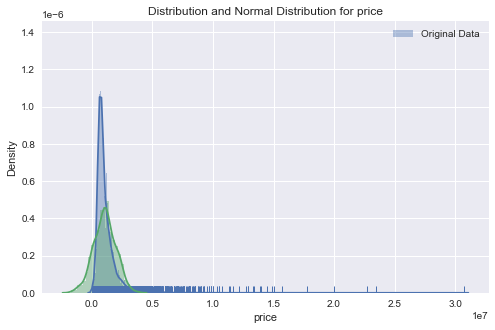

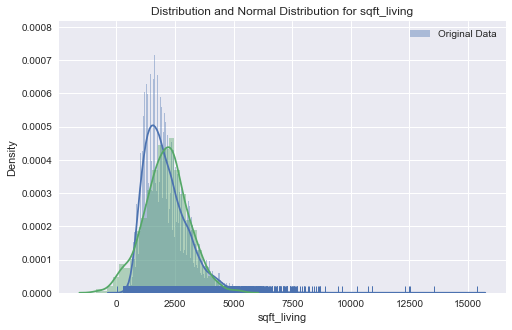

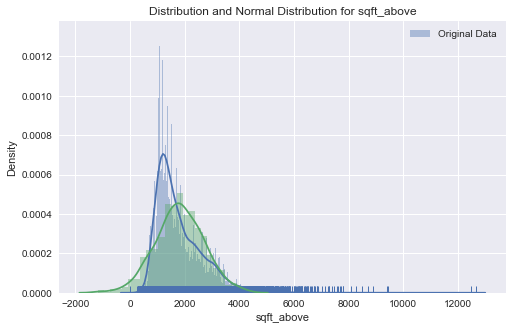

In [120]:
# Identify continuous data
continuous = ["price", "sqft_living", "sqft_above"]

# Create a new DataFrame to store the standardized data
standardized_data = king.copy()

# Standardize each feature in the 'continuous' list
for feature in standardized_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    standardized_data[feature] = (king[feature] - mean) / std
    
    # Plot distribution plot
    plt.figure(figsize=(8, 5))
    sns.distplot(king[feature], bins=1000, kde=True, rug=True, label='Original Data')
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 1000)
    sns.distplot(normal_dist)
    
    plt.title(f"Distribution and Normal Distribution for {feature}")
    plt.legend()
    plt.show()


In [121]:
# Set the z-score threshold for outlier detection
z_threshold = 3

# Find outliers for each feature in 'standardized_data'
outliers = {}
for feature in standardized_data[continuous]:
    z_scores = (standardized_data[feature] - standardized_data[feature].mean()) / standardized_data[feature].std()
    outliers[feature] = standardized_data[feature][np.abs(z_scores) > z_threshold]

# Filter out the rows containing outliers from 'standardized_data'
for feature, outlier_values in outliers.items():
    standardized_data = standardized_data.loc[~standardized_data.index.isin(outlier_values.index)]

# Reset the index of 'standardized_data'
standardized_data.reset_index(drop=True, inplace=True)

# Display the 'standardized_data' DataFrame after removing outliers
standardized_data[continuous]


price  sqft_living  sqft_above
0     -0.959825    -0.332119   -0.023201
1     -0.557643     0.121942    0.480372
2     -0.099188     0.664351   -0.490315
3     -0.556528     0.315073   -0.683996
4     -0.456136    -0.404029   -0.102952
...         ...          ...         ...
29372 -0.662496    -0.445121   -1.059966
29373 -0.383631    -0.178026    0.147695
29374 -0.743925    -1.092312   -0.866285
29375 -0.400363    -0.794399   -0.535887
29376 -0.127075     0.479439   -0.592852

[29377 rows x 3 columns]

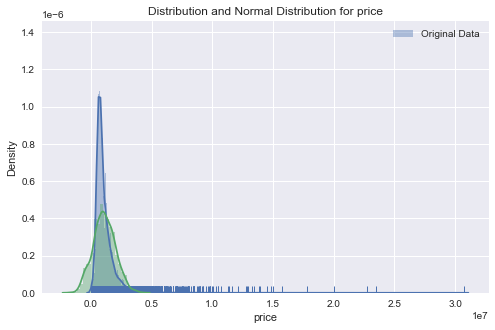

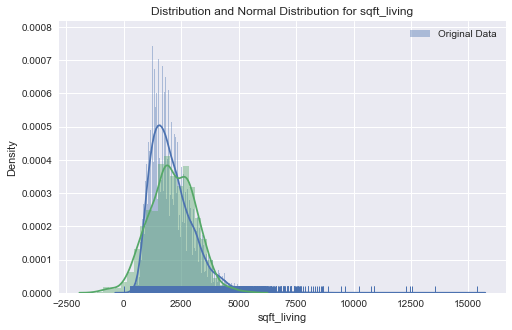

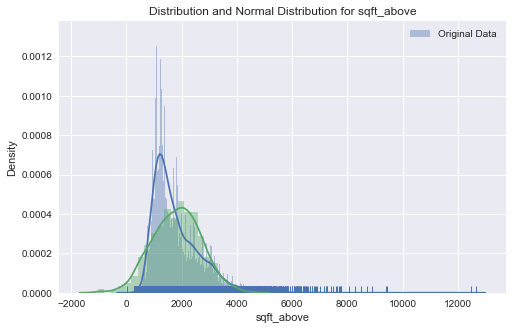

In [122]:
# Standardize each feature in the 'continuous' list
for feature in standardized_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    
    # Plot distribution plot
    plt.figure(figsize=(8, 5))
    sns.distplot(king[feature], bins=1000, kde=True, rug=True, label='Original Data')
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 1000)
    sns.distplot(normal_dist)
    
    plt.title(f"Distribution and Normal Distribution for {feature}")
    plt.legend()
    plt.show()

In [123]:
# Create a new DataFrame to store the data in its original form
original_data = standardized_data.copy()

# Loop through each feature in 'continuous' list
for feature in original_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    original_data[feature] = (standardized_data[feature] * std) + mean # standardized value is the z-score

# Clip the data to remove any negative values which can occur after reverting back from standardization values
num_columns = original_data.select_dtypes(include=[np.number]).columns
original_data[num_columns] = original_data[num_columns].clip(lower=0)

# Drop rows with zero values
zeros = original_data[(original_data[continuous] == 0).all(axis=1)]
original_data.drop(zeros.index, axis=0, inplace=True)

# Reset the index of 'original_data'
original_data.reset_index(drop=True, inplace=True)

# Display the 'original_data' DataFrame
original_data


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2021-10-20   248448.0         3        1.5       1790.0     39808   
1     2022-04-05   609000.0         4        1.5       2232.0     12866   
2     2022-05-26  1020000.0         5        2.0       2760.0     15156   
3     2022-01-03   610000.0         5        2.0       2420.0     15552   
4     2022-03-09   700000.0         3        2.0       1720.0      8620   
...          ...        ...       ...        ...          ...       ...   
29372 2021-10-27   515000.0         3        1.0       1680.0      8100   
29373 2022-05-09   765000.0         3        2.0       1940.0      7747   
29374 2022-04-07   442000.0         2        1.0       1050.0     12105   
29375 2021-07-09   750000.0         2        1.0       1340.0      6181   
29376 2021-11-18   995000.0         4        2.0       2580.0      7200   

       floors waterfront greenbelt nuisance  ... sqft_above sqft_garage  \
0         1.0         NO        NO       NO  ...     1790.0         460   
1         1.5         NO        NO       NO  ...     2232.0         440   
2         1.0         NO        NO       NO  ...     1380.0           0   
3         1.0         NO        NO       NO  ...     1210.0           0   
4         1.5         NO        NO       NO  ...     1720.0           0   
...       ...        ...       ...      ...  ...        ...         ...   
29372     1.0         NO        NO       NO  ...      880.0           0   
29373     1.5         NO        NO       NO  ...     1940.0         430   
29374     1.0         NO        NO       NO  ...     1050.0         220   
29375     1.5         NO        NO      YES  ...     1340.0           0   
29376     1.0         NO        NO       NO  ...     1290.0         310   

      sqft_patio                      yr_built  \
0            290 1970-01-01 00:00:00.000001958   
1             60 1970-01-01 00:00:00.000001934   
2              0 1970-01-01 00:00:00.000001954   
3            330 1970-01-01 00:00:00.000001955   
4              0 1970-01-01 00:00:00.000001948   
...          ...                           ...   
29372          0 1970-01-01 00:00:00.000001943   
29373        230 1970-01-01 00:00:00.000001939   
29374          0 1970-01-01 00:00:00.000001939   
29375        540 1970-01-01 00:00:00.000001920   
29376        160 1970-01-01 00:00:00.000001955   

                                                 address        lat long  \
0      1526 I Street Northeast, Auburn, Washington 98...  47.321780  0.0   
1      1412 I Street Northeast, Auburn, Washington 98...  47.320830  0.0   
2      1104 Southwest Shorebrook Drive, Normandy Park...  47.443750  0.0   
3      7205 South 133rd Street, Seattle, Washington 9...  47.483870  0.0   
4      5610 South 141st Street, Tukwila, Washington 9...  47.477070  0.0   
...                                                  ...        ...  ...   
29372  1220 Southwest 149th Street, Burien, Washingto...  47.469695  0.0   
29373  1255 Southwest 150th Street, Burien, Washingto...  47.468255  0.0   
29374  1249 Southwest 150th Street, Burien, Washingto...  47.468280  0.0   
29375  1412 Southwest 152nd Street, Burien, Washingto...  47.466975  0.0   
29376  11740 24th Avenue Northeast, Seattle, Washingt...  47.715120  0.0   

      basement  extracted_grade_num  condition_num  
0            0                    7              4  
1            0                    7              4  
2            1                    8              4  
3            1                    7              3  
4            0                    7              5  
...        ...                  ...            ...  
29372        1                    6              4  
29373        0                    7              4  
29374        0                    6              3  
29375        1                    7              4  
29376        1                    8              3  

[29377 rows x 23 columns]

# Exploratory Data Analysis

Lets explore what can be continuos that in reality is categorical and vice versa. 

### Determine Linearity between variables

Determine Linearity Visually first between variables

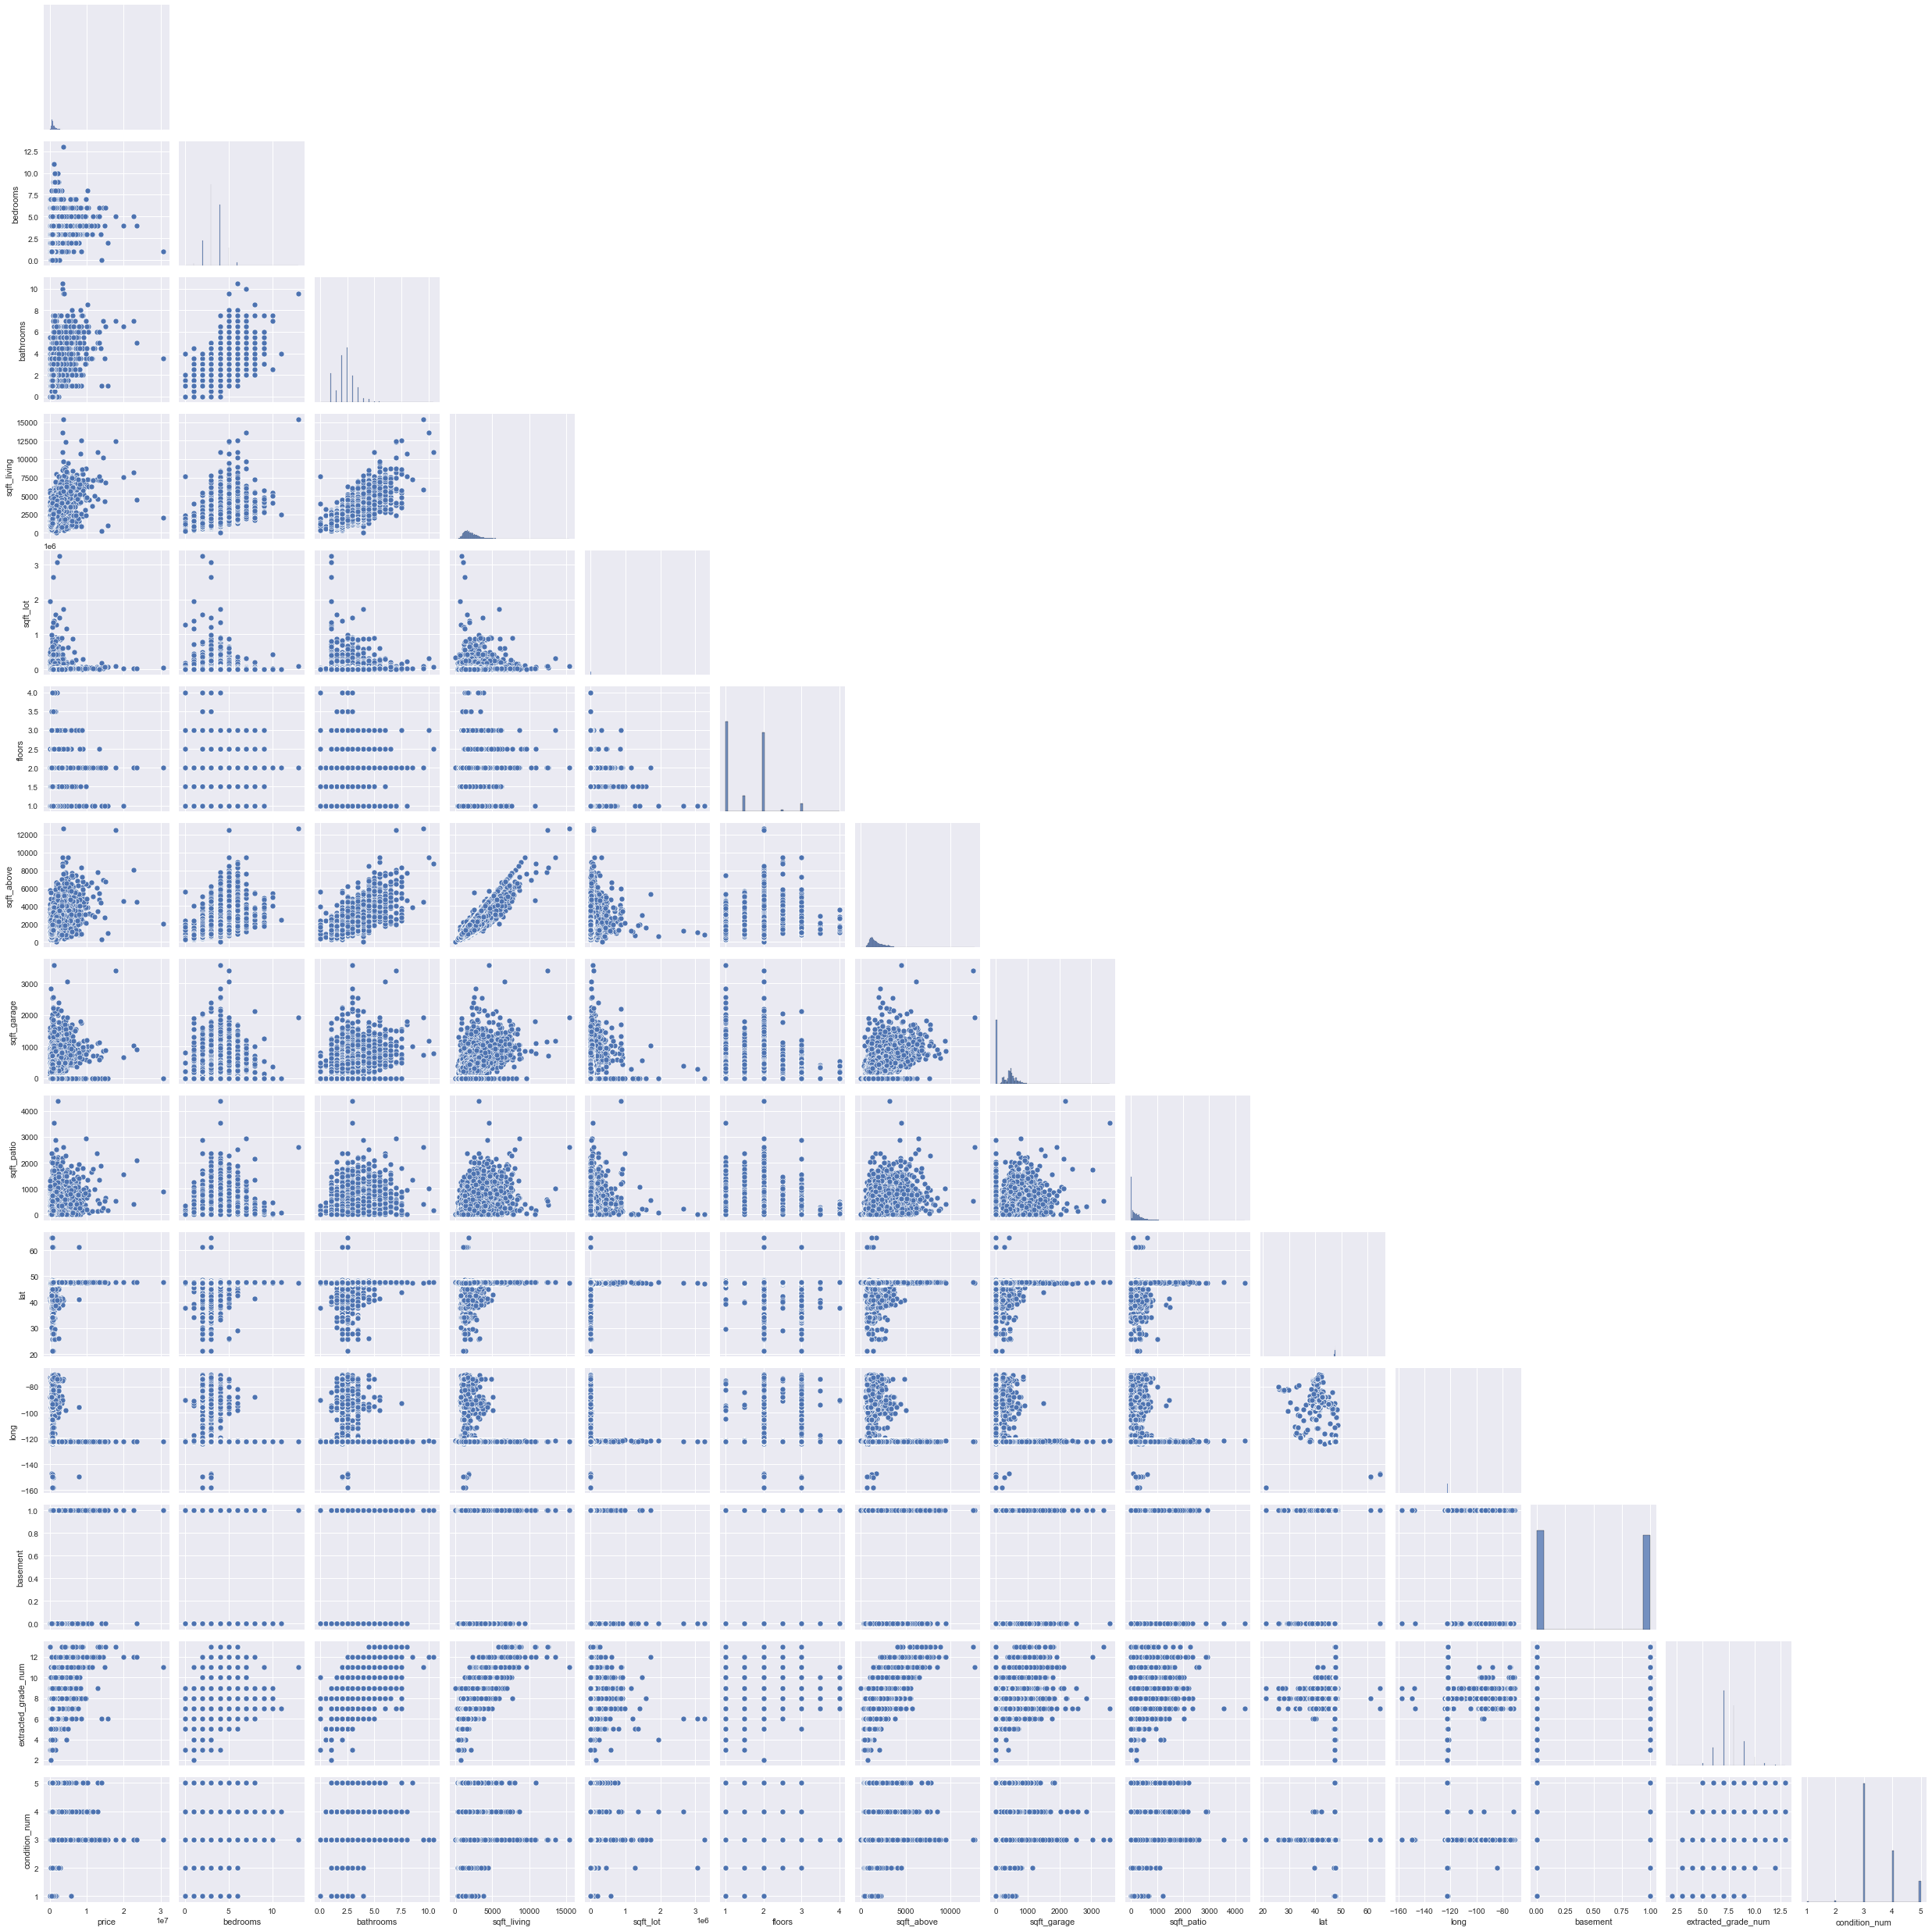

In [124]:
# Create a scatter plot matrix using seaborn
sns.pairplot(king, diag_kind='hist', corner=True)

**Observations:**
There is some degree of linearity for the following pairs that I think contribute most to a homes value:
* 'price vs sqft_above', 'price vs sqft_living', 
There seems to be a trend of increasing price for the following pairs:
* 'price vs bathrooms', 'price vs bedrooms', 'price vs extracted_grade_num', 'price vs garage', 'price vs patio', 'price vs basement'

We have two types of data in this dataset. There are categorical variables and continuous variables. Based off the descriptions and viewing the descriptions the following conclusion can be made:
1. continuous variables = price, sqft_living, sqft_above
2. categorical variables = bedrooms, bathrooms, floors, waterfront, condition, grade, sqft_lot, sqft_garage, sqft_patio

That being said lets split our data to view how they behave in respect to price which is our target variable. 

In [125]:
# split data into 2 groups of type continous and type categoricals.
# Add price to both groups to view correlations in respect to price.
continuous = ['price', 'sqft_living', 'sqft_above', 'sqft_patio', 'sqft_lot']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'extracted_grade_num', 'condition_num']

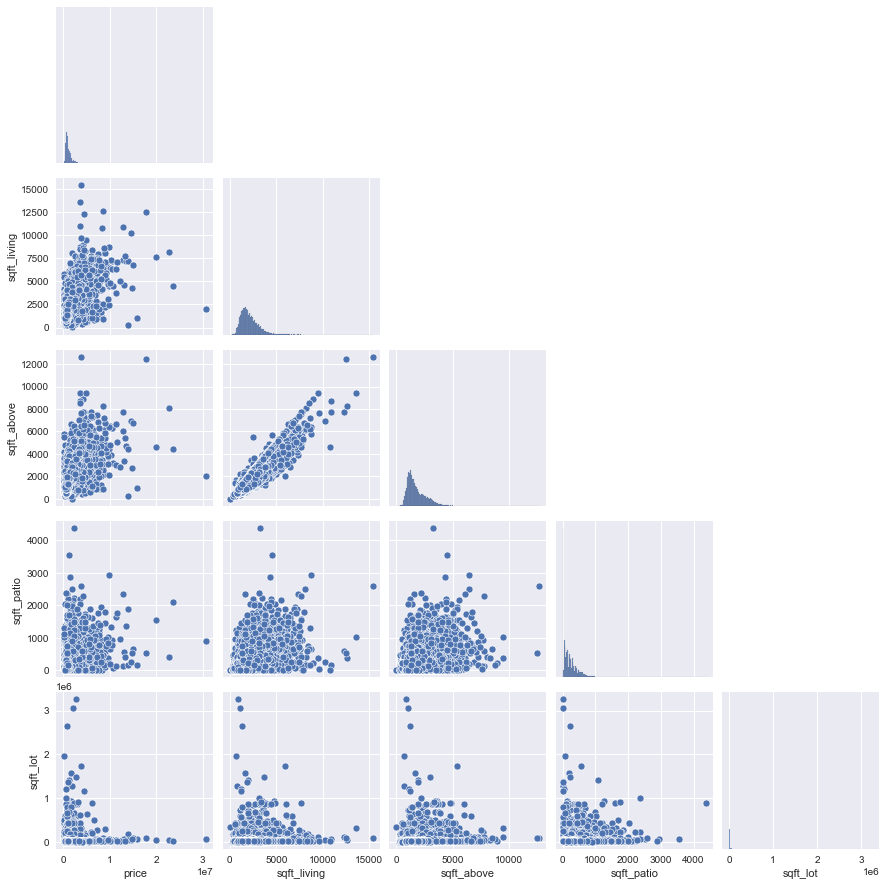

In [126]:
# Create a scatter plot matrix for continuous values using seaborn
sns.pairplot(king[continuous], diag_kind='hist', corner=True)

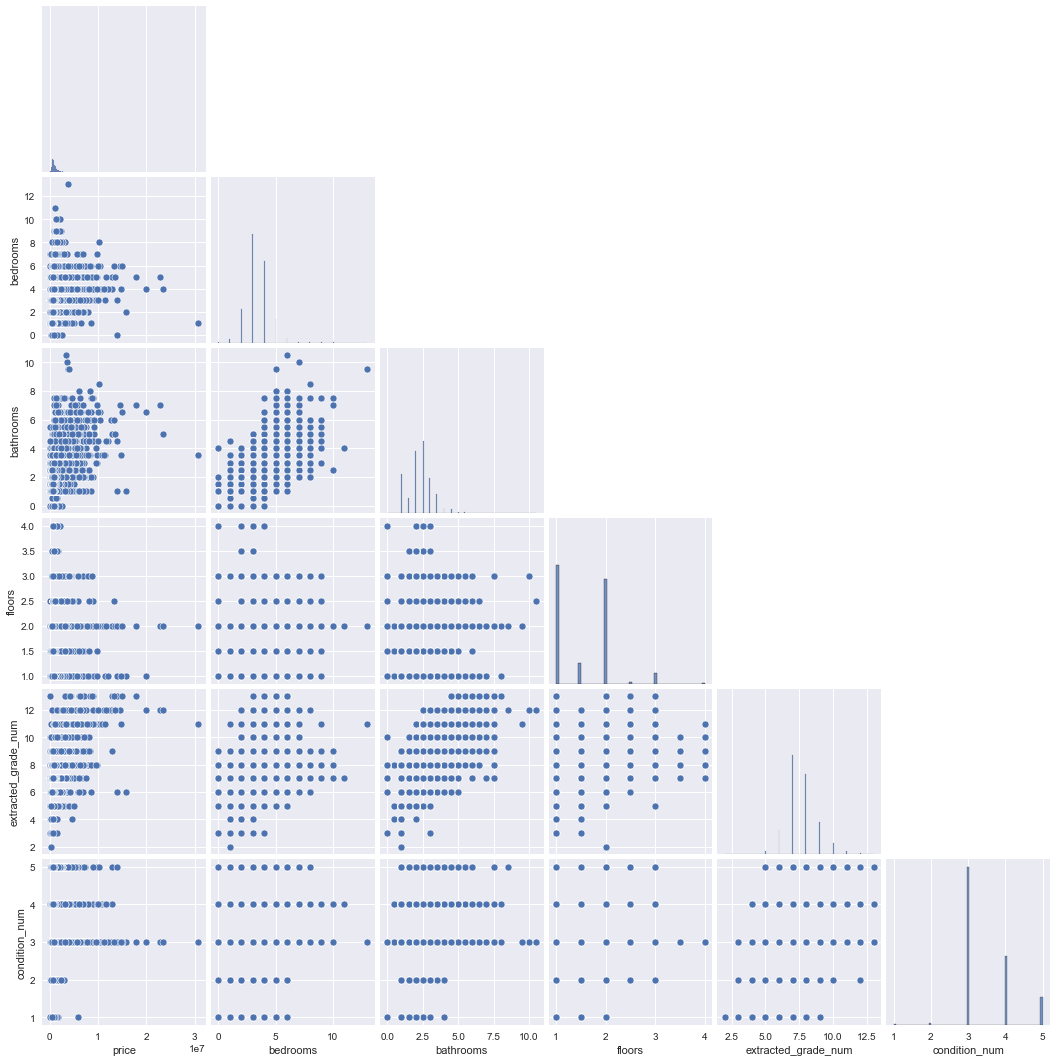

In [127]:
# Create a scatter plot matrix for categorical values using seaborn
sns.pairplot(king[categoricals], diag_kind = 'hist', corner = True)


View correlations matrix with respect to price

In [128]:
king.corr()['price']

price                  1.000000
bedrooms               0.288992
bathrooms              0.480284
sqft_living            0.608586
sqft_lot               0.086562
floors                 0.180555
sqft_above             0.538614
sqft_garage            0.263655
sqft_patio             0.313787
lat                    0.063419
long                  -0.022271
basement               0.103207
extracted_grade_num    0.566508
condition_num         -0.009563
Name: price, dtype: float64

# Factors to consider for each feature of a Home
We are looking at linearity of a feature with respect to 'price'. We should consider the following factors:

### **Skweness**
Skewness is the degree of distortion or deviation from the symmetrical normal distribution. Skewness can be seen as a measure to calculate the lack of symmetry in the data distribution. Skewness helps you identify extreme values in one of the tails. Symmetrical distributions have a skewness of 0.
* A distribution is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.
* Distributions are negatively skewed when the tail on the left side of the distribution is longer or fatter than the tail on the right side. When there is negative skewness, the mean and median are smaller than the mode.
* Skewness talks about extreme values in one tail 
* The "normality assumption" does not hold when data is skewed. When data is skewed, it must be transformed first in order to interpret that data.
#### When data is skewed use the following rules:
The rule of thumb seems to be:
* A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
* A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that the data are moderately skewed.
* A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data are highly skewed.

![Skewness distributions](../images/Skewness_Image.png)

### **Kurtosis**
Kurtosis deals with the lengths of tails in the distribution. kurtosis aims at identifying extreme values in both tails at the same time. Kurtosis can be viewed as a measure of outliers present in the distribution.
#### Mesokurtic (kurtosis = 3) 
* Kurtosis statistics that lie close to the ones of a normal distribution. 
* Mesokurtic distributions have a kurtosis of around 3. According to this definition, the standard normal distribution has a kurtosis of 3.
#### Platykurtic (kurtosis < 3)
* The distribution is shorter and tails are thinner than the normal distribution. 
* The peak is lower and broader than Mesokurtic, which means that the tails are light and that there are fewer outliers than in a normal distribution.
#### Leptokurtic (kurtosis > 3)
* A distribution with longer and fatter tails. 
* The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.
* Outliers stretch your horizontal axis of the distribution, which means that the majority of the data appear in a narrower vertical range. That is why the leptokurtic distribution looks "skinny".

![Kurtosis distributions](../images/Kurtosis_types.png)

### **Pearson correlation**
* A value = 0 suggets no correlation between variables.
* A value closer to 0 implies weaker correlation between variables.
* A value closer to 1 implies stronger positive correlation between variables.
* A value closer to -1 implies stronger negative correlation between variables.

# What features in this dataset can be good predictors for the price of a home?
### Target Variable : Price

In [129]:
"""
Lets begin by observing basic statistics about the price itself. 
Observe if the price is skewed as well as its kurtosis. 
Viewing both can give us direction to determine how to deal with the price data. 
1. View skewness and Kurtosis values.
2. View a basic scatter plot of price and the number of prices/counts of each price.
3. Generate Q-Q plot to view normality of data. 
"""

'\nLets begin by observing basic statistics about the price itself. \nObserve if the price is skewed as well as its kurtosis. \nViewing both can give us direction to determine how to deal with the price data. \n1. View skewness and Kurtosis values.\n2. View a basic scatter plot of price and the number of prices/counts of each price.\n3. Generate Q-Q plot to view normality of data. \n'

In [130]:
# Generate summary statistics
king['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [131]:
# Obtain skewness value
skewness = king['price'].skew()
print('Skewness_value: ', skewness)
# Obtain Kurtosis value
kurtosis = king['price'].kurtosis()
print('kurtosis_value: ', kurtosis)

Skewness_value:  6.608504428167346
kurtosis_value:  106.26296241029947


1. Overall the price data is very positively skewed and favors is skewed towards values in price closer to zero dollars. 
2. The kurtosis value suggests that the data in price is leptokurtic. This suggests that there is a large tail due to large outliers. This most likely indicates that there are homes that sold for millions of dollars more in higher class areas in this datasey which might be rare to sell. 

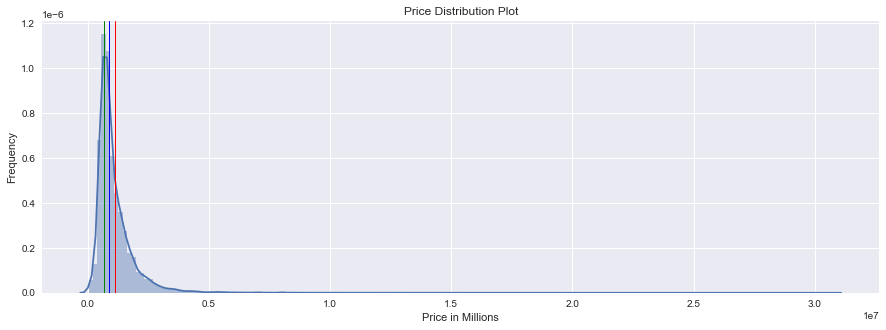

Text(0.5, 1.0, 'Price Qunatile-Quantile Plot')

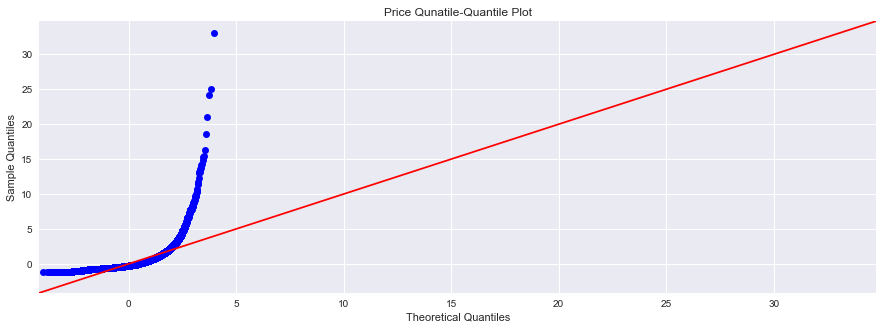

In [132]:
# Generate a distribution plot to view the price data. 
plt.figure(figsize=(15, 5))
sns.distplot(king['price'], bins=int(round(len(king['price'])**0.5)), kde=True)
plt.xlabel("Price in Millions")
plt.ylabel("Frequency")
plt.title("Price Distribution Plot")
plt.axvline(x=king['price'].mean(), linestyle="-", linewidth=1, color="r")
plt.axvline(x=king['price'].median(), linestyle="-", linewidth=1, color="b")
plt.axvline(x=king['price'].mode().iloc[0], linestyle="-", linewidth=1, color="g")
plt.xticks(fontsize = 10)
plt.show()

#check for normality
fig = sm.graphics.qqplot(king['price'], dist = stats.norm, line = '45', fit = True)
fig.set_size_inches(15, 5)
plt.title('Price Qunatile-Quantile Plot')

Clearly the price distribution does not follow a normal distribution and would require a transformation. Lets transform the price data by using log transformation to help with this. 

#### Observe and check for linearity with target variable of interest price_log with other features of a house.

The continuos variables in this dataset are: 
* sqft_living
* sqft_above
* sqft_lot
* sqft_garage
* sqft_patio
* price
* lat
* long

The categoraical variables in this dataset are: 
* bedrooms
* bathrooms
* floors
* waterfront
* greenbelt
* nuisance
* view
* condition
* grade
* heat_source
* sewer_system
* yr_built
* yr_renovated
* garage

## Continuos Variables

#### Linearity check of Continuos variables

In [133]:
# View columns in dataset.
for col in king.columns:
    print(col)

date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
grade
heat_source
sewer_system
sqft_above
sqft_garage
sqft_patio
yr_built
address
lat
long
basement
extracted_grade_num
condition_num


In [134]:
# define subset of continuous variables 
# As mentioned before continuos = ["sqft_living", "sqft_above", "sqft_lot", "sqft_garage", "sqft_patio"]

In [135]:
# Create a function that can return linearity information and geenrate disttribution plots and q-q plots
def linearity_check(data, list):
    """
    Function arguments are data=dataframe, target=target_variable to check target variable for linearity check. 
    Generates Q-Q plots and distribution plots as well an organized dataframe containing the skewness and kurtosis values of the variables in list.
    """
    result_df = pd.DataFrame(columns=['Variable', 'Skewness', 'Kurtosis'])
    
    for target in list:
    # Extracting the mean, median
        mean_value = data[target].mean()
        median_value = data[target].median()
        
        # Generate distribution plot with target variable
        plt.figure(figsize=(15, 5))
        sns.distplot(data[target], bins=int(round(len(data[target])**0.5)), kde=True)
        plt.xlabel(f"{target}")
        plt.ylabel("Frequency")
        plt.title(f"{target} Distribution Plot")
        plt.axvline(x=mean_value, linestyle="-", linewidth=1, color="r")
        plt.axvline(x=median_value, linestyle="-", linewidth=1, color="b")
        plt.xticks(fontsize = 10)
        plt.show()
        
        #check for normality in price_log
        fig = sm.graphics.qqplot(data[target], dist = stats.norm, line = '45', fit = True)
        fig.set_size_inches(15, 5)
        plt.title(f'{target} Quantile-Quantile Plot')
        
        # Generates skewness value
        skewness_value = data[target].skew()
        # Generates kurtosis value
        kurtosis_value = data[target].kurtosis()
        
        # Append to the result dataframe
        result_df = result_df.append({'Variable': target, 'Skewness': skewness_value, 'Kurtosis': kurtosis_value}, ignore_index=True)
    return result_df

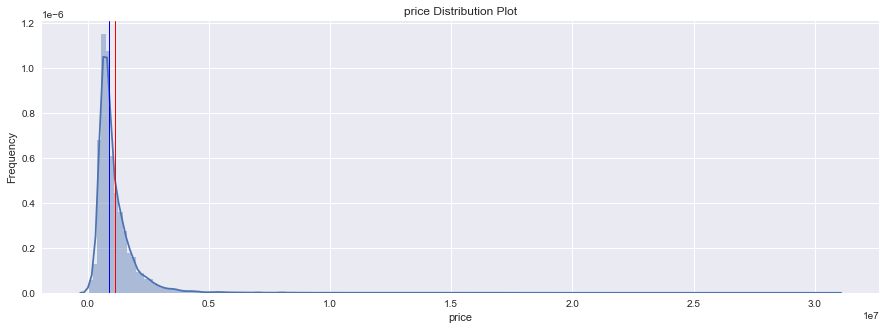

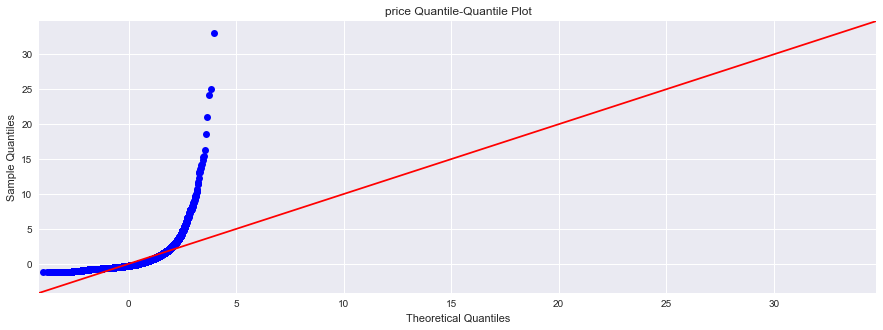

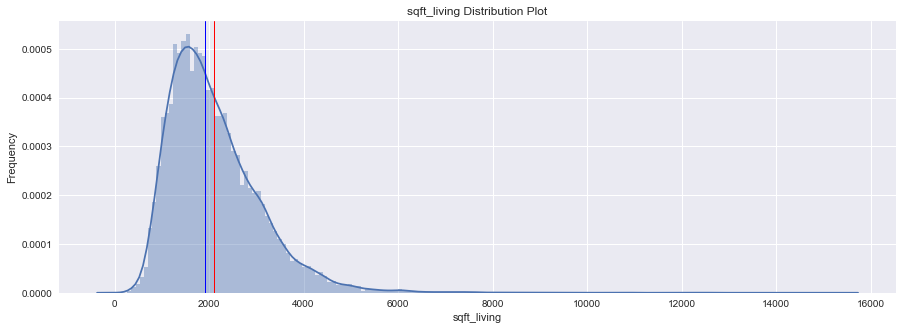

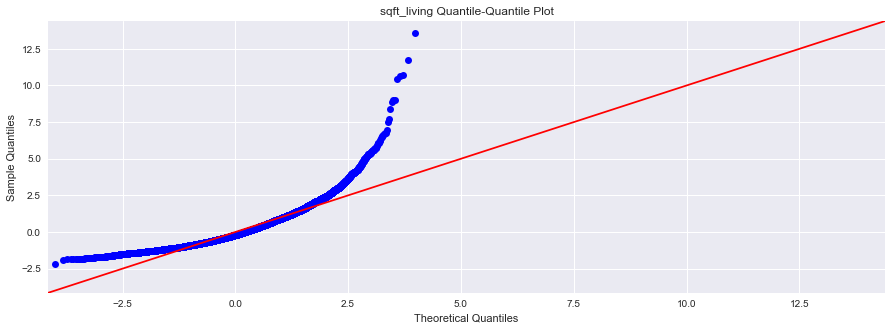

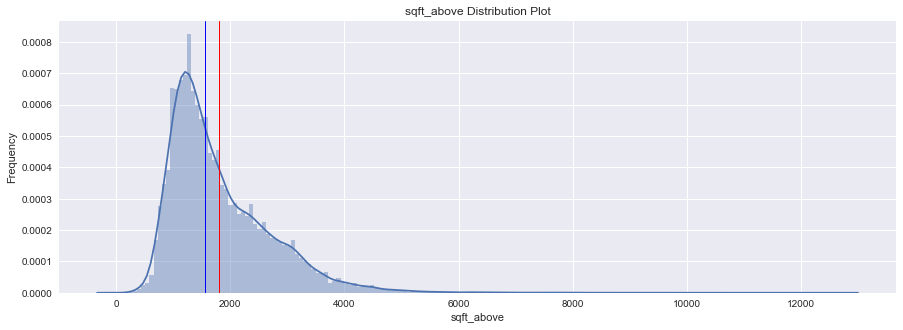

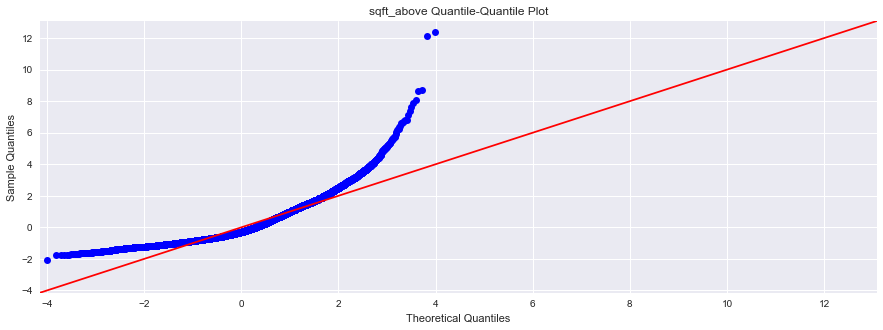

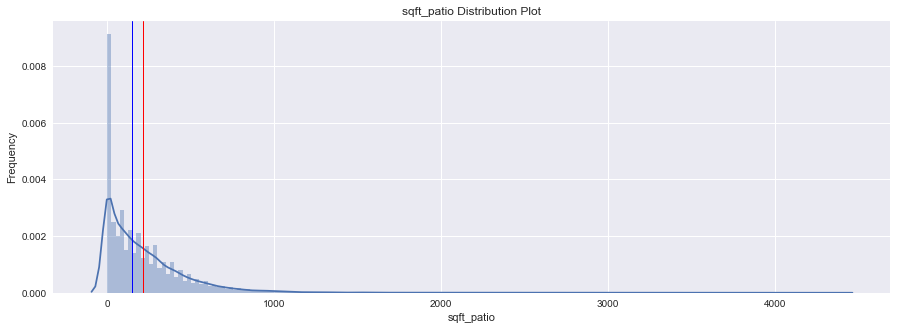

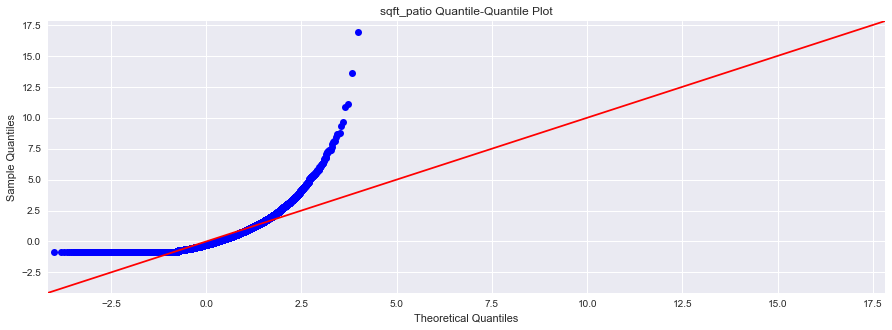

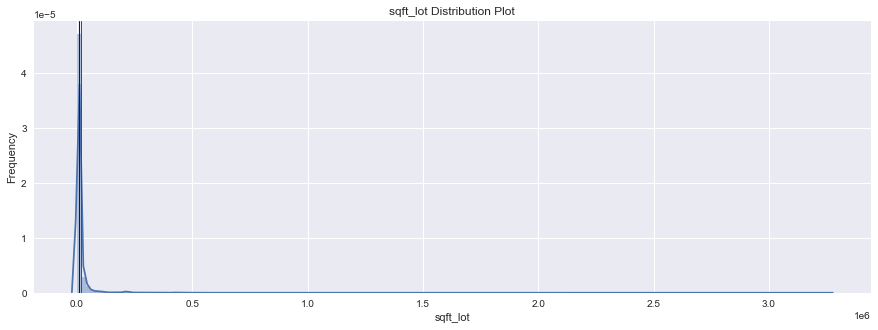

Variable   Skewness    Kurtosis
0        price   6.608504  106.262962
1  sqft_living   1.611730    6.720625
2   sqft_above   1.556087    4.811108
3   sqft_patio   2.346323   11.684839
4     sqft_lot  21.277548  791.674133

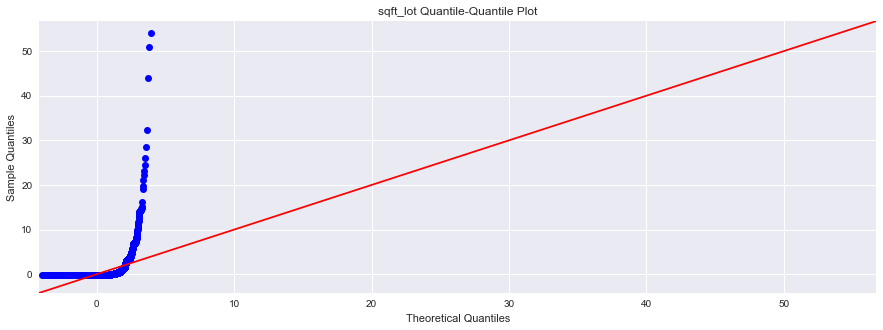

In [136]:
linearity_check(king, continuous)

**Observations**: 

Sqft_living:

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_above: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_lot: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that it has major outliers.

sqft_garage: 

> We can see how the data is positively skewed moderately. It is also Platykurtic. We can attempt a log transformation to bring the data closer norm. It also seems that not every home has a garage. Maybe it would be better to use this as an interaction term.

sqft_patio: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that not every home has a patio. Maybe it would be better to use this as an interaction term.

#### Log Transformation for continuous variables. 

In [36]:
# Create a function that can transform the features into log[feature]. 
def transform(data, feature):
    """
    Takes in a dataset=data and a subset of columns=feature. 
    Function then transforms the features into log[feature] and appends a new column in the original dataframe. 
    """
    # import required libraries.
    import numpy as np
    # for loop iterating through columns in subset.
    for col in feature:
        data[f"{col}_log"] = np.log(data[col])

In [37]:
# Create a new subset because we don't want to transform the coordinates of the homes long and latitude 
# as well as the basement since we will be using it instead as a categorical variable.
continuos_2 = ["sqft_living", "sqft_above", "sqft_lot"]

# Use log transformation function
transform(king, continuos_2)

king.head(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   
17878 2022-01-03   610000.0         5        2.0         2420     15552   
14450 2022-03-09   700000.0         3        2.0         1720      8620   

       floors waterfront greenbelt nuisance  ...  \
21177     1.0         NO        NO       NO  ...   
10844     1.5         NO        NO       NO  ...   
9292      1.0         NO        NO       NO  ...   
17878     1.0         NO        NO       NO  ...   
14450     1.5         NO        NO       NO  ...   

                                                 address       lat       long  \
21177  1526 I Street Northeast, Auburn, Washington 98...  47.32178 -122.21875   
10844  1412 I Street Northeast, Auburn, Washington 98...  47.32083 -122.21874   
9292   1104 Southwest Shorebrook Drive, Normandy Park...  47.44375 -122.34868   
17878  7205 South 133rd Street, Seattle, Washington 9...  47.48387 -122.24393   
14450  5610 South 141st Street, Tukwila, Washington 9...  47.47707 -122.26385   

      extracted_grade_num extracted_class  condition_num  price_log  \
21177                   7         Average              4  12.422989   
10844                   7         Average              4  13.319574   
9292                    8            Good              4  13.835313   
17878                   7         Average              3  13.321214   
14450                   7         Average              5  13.458836   

       sqft_living_log  sqft_above_log sqft_lot_log  
21177         7.489971        7.489971    10.591823  
10844         7.710653        7.710653     9.462343  
9292          7.922986        7.229839     9.626152  
17878         7.791523        7.098376     9.651945  
14450         7.450080        7.450080     9.061840  

[5 rows x 31 columns]

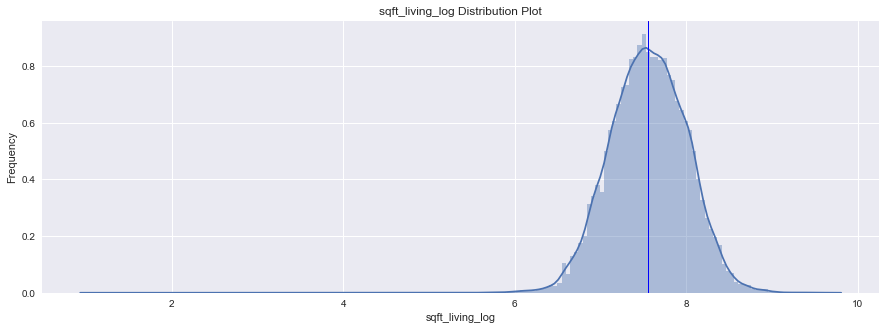

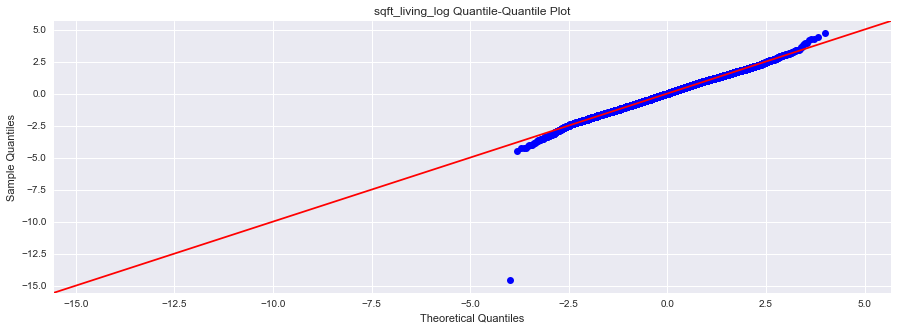

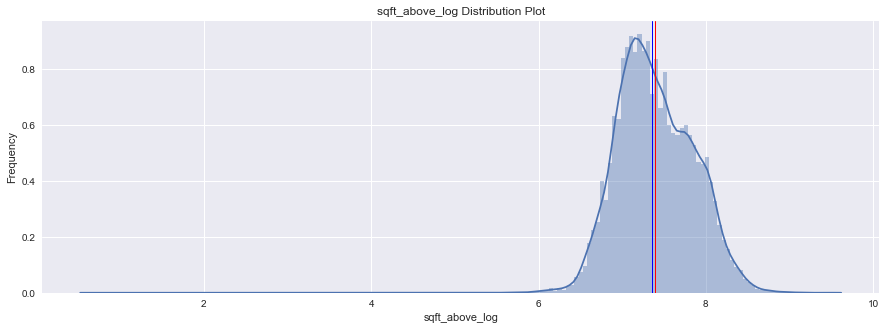

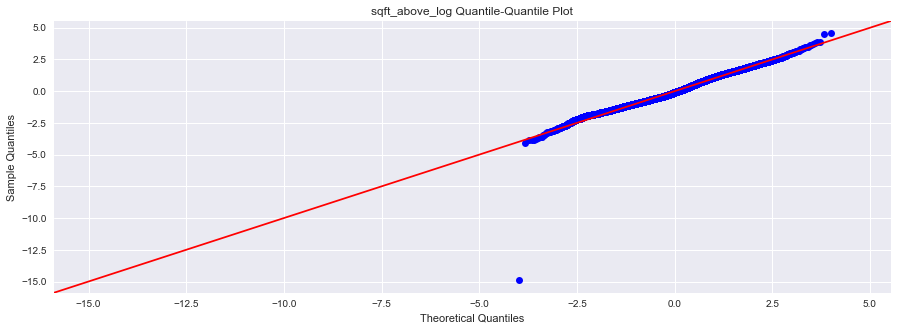

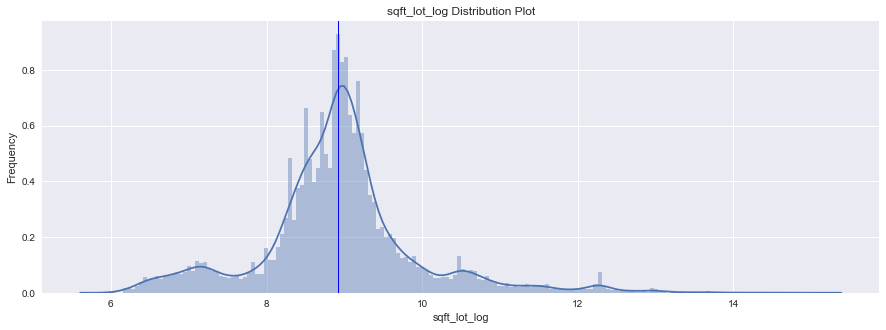

Variable  Skewness  Kurtosis
0  sqft_living_log -0.153745  1.523212
1   sqft_above_log  0.098969  1.355249
2     sqft_lot_log  0.657917  2.779017

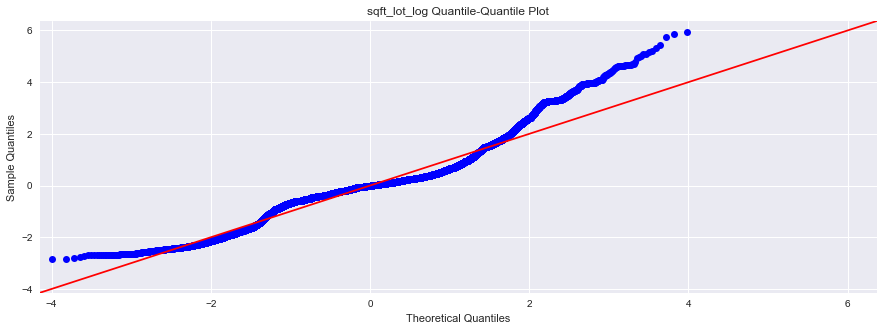

In [38]:
# Use Linearity Function check
continuos_log = ["sqft_living_log", "sqft_above_log", "sqft_lot_log"]
linearity_check(king, continuos_log)

Now that we have everything normalized lets check the corelations between variables and price using a matrix. 

In [39]:
def view_correlation(data, subset):
    subset = subset + ['price', 'price_log']  # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='blue'
        )
        plt.title(f'{col} of The Home vs. Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price_log'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='red'
        )
        plt.title(f'{col} of The Home vs. Log Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
    corr_df = data[subset].corr()
    return corr_df

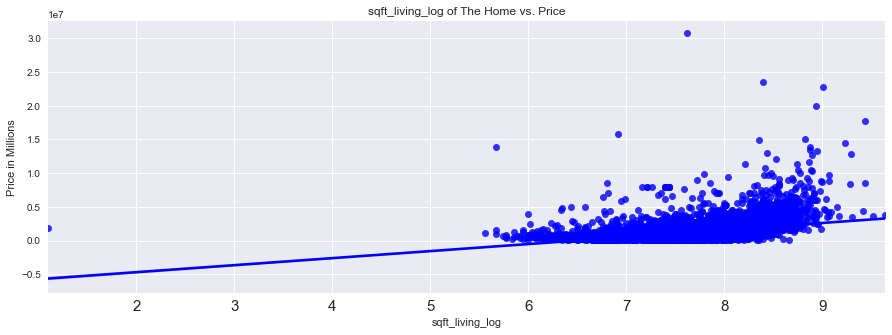

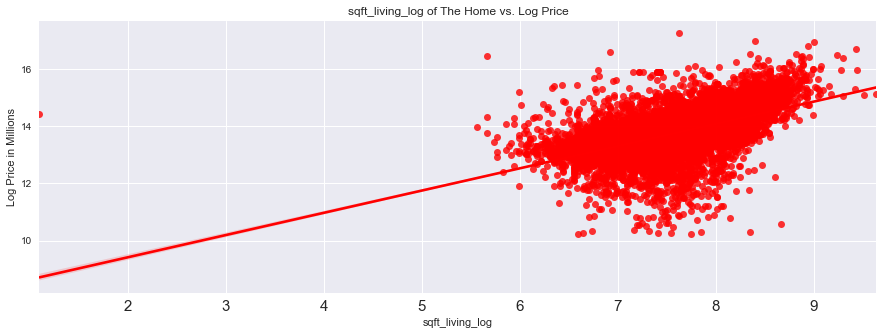

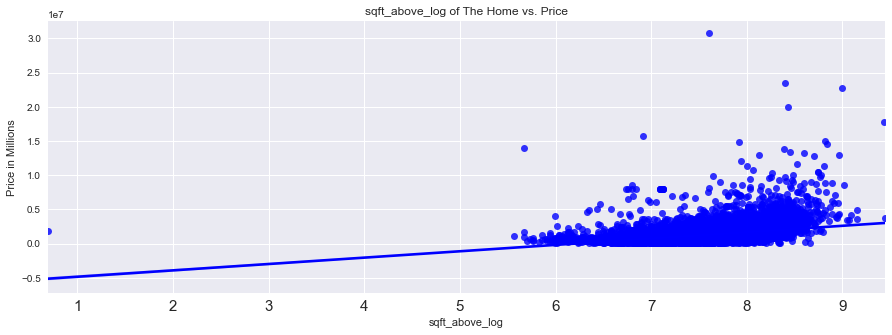

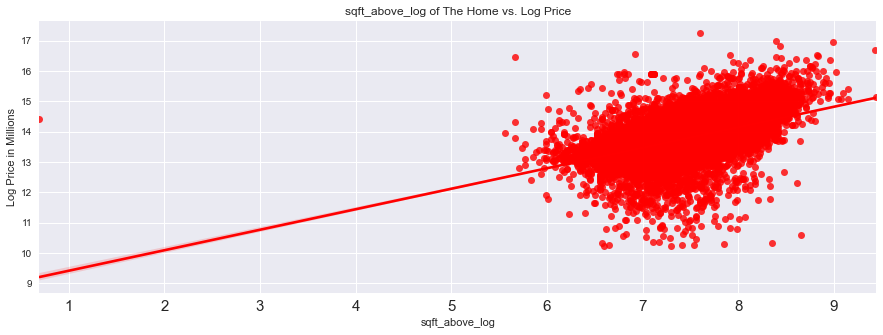

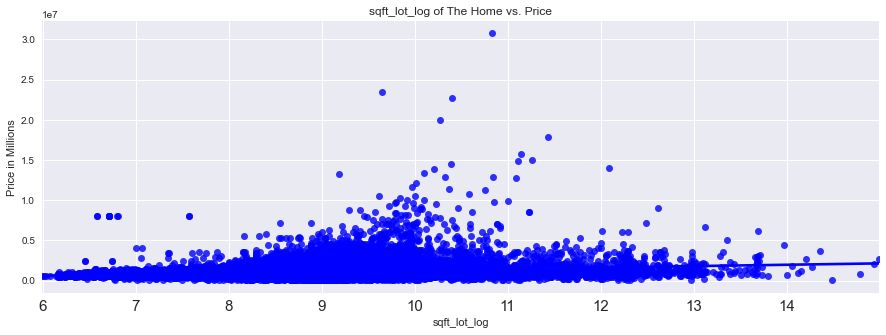

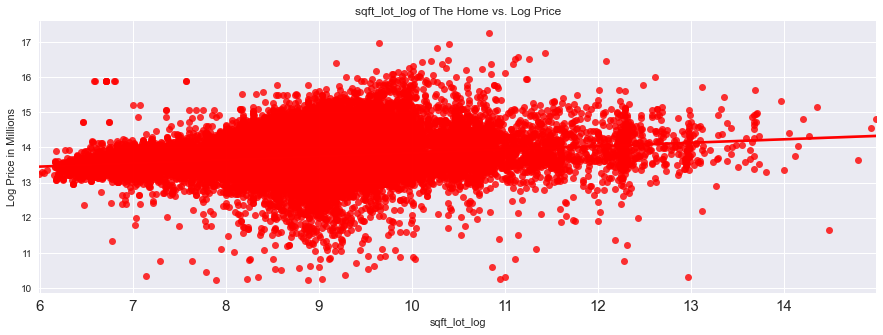

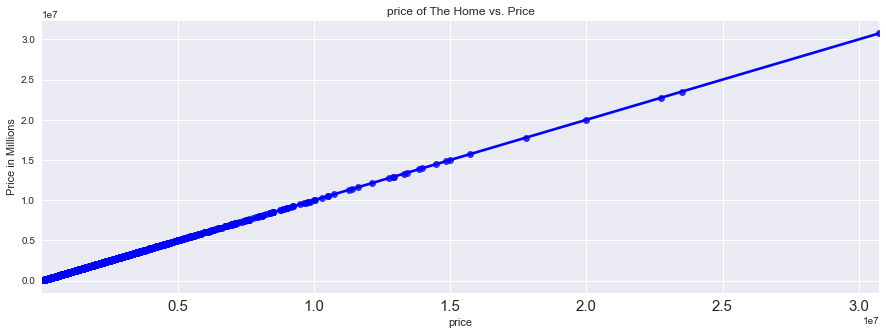

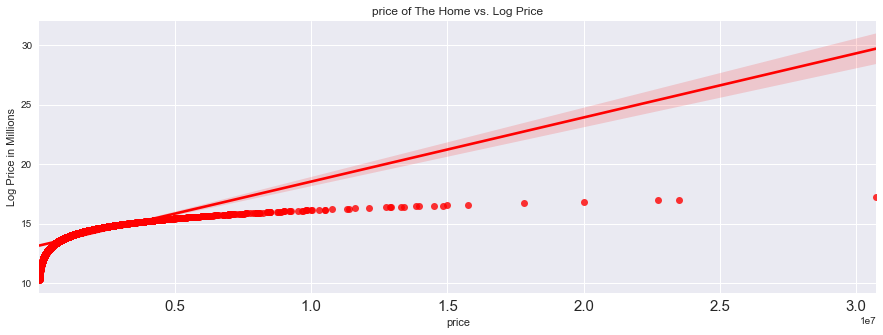

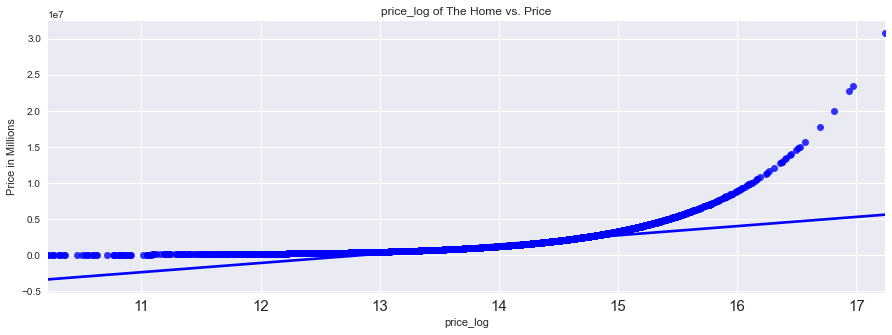

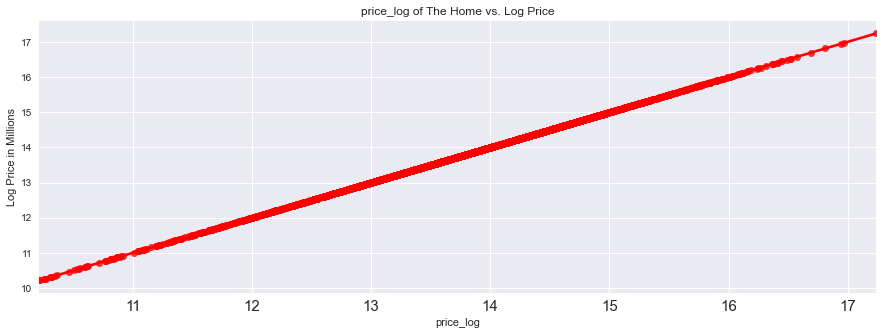

sqft_living_log  sqft_above_log  sqft_lot_log     price  \
sqft_living_log         1.000000        0.874526      0.307858  0.515395   
sqft_above_log          0.874526        1.000000      0.316209  0.466982   
sqft_lot_log            0.307858        0.316209      1.000000  0.194257   
price                   0.515395        0.466982      0.194257  1.000000   
price_log               0.591033        0.522001      0.170734  0.829922   

                 price_log  
sqft_living_log   0.591033  
sqft_above_log    0.522001  
sqft_lot_log      0.170734  
price             0.829922  
price_log         1.000000

In [40]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log"]
view_correlation(king, subset)

**Observations:**
1. sqft_living_log and sqft_above_log are moderately positively correlated with price_log. 
2. sqft_lot_log has very little to none with price_log

**Observations:**
1. Using price that is not transformed is probably better mainly because it would be easier to interpret coefficients in Linear regression models. We can connvert the transmission by divinding by 100 and take advantage of the property of logarithmic functions. We can state that for each increase of 1% in <feature>, we see an associated change of <coefficient / 100> in target.
2. sqft_living_log is moderately positively correlated with price.
3. sqft_lot_log and sgft_above log have little correlation with price

## Exploring interactions the Continuous variables:

Now that the continuos variables are explored and interpreted lets view the interactions of basement, patio, and garage with price

First investigation is Basement:

In [41]:
"""
Right now the dataframe has basement sqft data. 
Maybe we can distinguish if having a basement actually controbutes to a higher home value.
We can create a new column that returns 1 if there is a basement and 0 if there is no basement. 
"""

'\nRight now the dataframe has basement sqft data. \nMaybe we can distinguish if having a basement actually controbutes to a higher home value.\nWe can create a new column that returns 1 if there is a basement and 0 if there is no basement. \n'

In [42]:
# Treat basement as categorical variable
king['basement'] = king['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

king.head(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   
17878 2022-01-03   610000.0         5        2.0         2420     15552   
14450 2022-03-09   700000.0         3        2.0         1720      8620   

       floors waterfront greenbelt nuisance  ...       lat       long  \
21177     1.0         NO        NO       NO  ...  47.32178 -122.21875   
10844     1.5         NO        NO       NO  ...  47.32083 -122.21874   
9292      1.0         NO        NO       NO  ...  47.44375 -122.34868   
17878     1.0         NO        NO       NO  ...  47.48387 -122.24393   
14450     1.5         NO        NO       NO  ...  47.47707 -122.26385   

      extracted_grade_num extracted_class condition_num  price_log  \
21177                   7         Average             4  12.422989   
10844                   7         Average             4  13.319574   
9292                    8            Good             4  13.835313   
17878                   7         Average             3  13.321214   
14450                   7         Average             5  13.458836   

       sqft_living_log  sqft_above_log  sqft_lot_log basement  
21177         7.489971        7.489971     10.591823        0  
10844         7.710653        7.710653      9.462343        0  
9292          7.922986        7.229839      9.626152        1  
17878         7.791523        7.098376      9.651945        1  
14450         7.450080        7.450080      9.061840        0  

[5 rows x 32 columns]

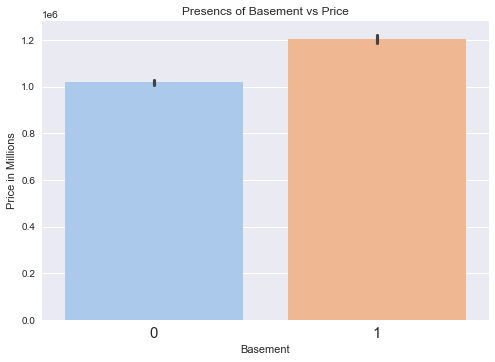

In [43]:
# Make a barplot of basement vs price
sns.barplot(x=king['basement'], 
            y=king['price'],
            palette="pastel",
            )
plt.title("Presencs of Basement vs Price")
plt.xlabel("Basement")
plt.ylabel("Price in Millions")
plt.xticks(fontsize = 15)
plt.show()

**Observation:**
1. It seems that having a basement does increase the price of a home in King County.

In [44]:
"""
Use Basement as an interaction term for the other continuos variables. 
"""

'\nUse Basement as an interaction term for the other continuos variables. \n'

In [45]:
def price_interations_basement(data, subset):
    subset = subset + ['price', 'price_log', 'basement']  # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price' vs. sqft_subset_log'
        plt.figure(figsize = (15, 10))
        data.plot.scatter(
            x = col,
            y = 'price',
            c = 'basement',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Price')
        plt.ylabel('Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        data.plot.scatter(
            x = col,
            y = 'price_log',
            c = 'basement',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Log Price')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[['basement', 'price', 'price_log']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix: Basement, Price, and Log Price')
    plt.show()

<Figure size 1080x720 with 0 Axes>

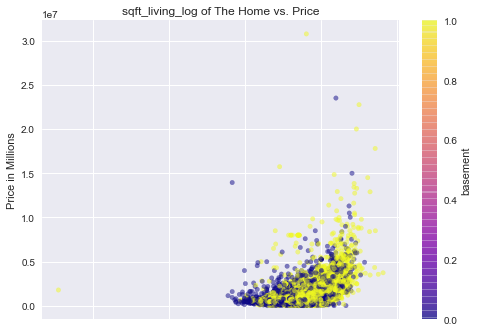

<Figure size 1080x360 with 0 Axes>

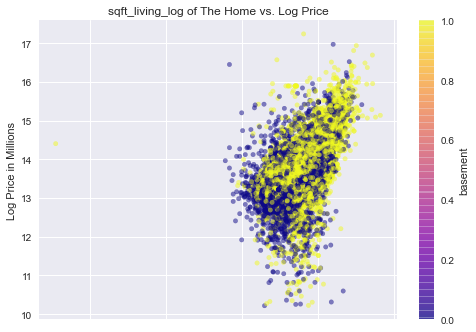

<Figure size 1080x720 with 0 Axes>

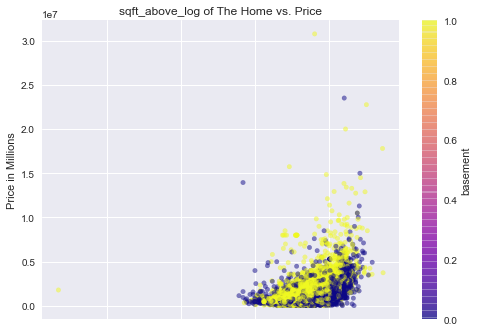

<Figure size 1080x360 with 0 Axes>

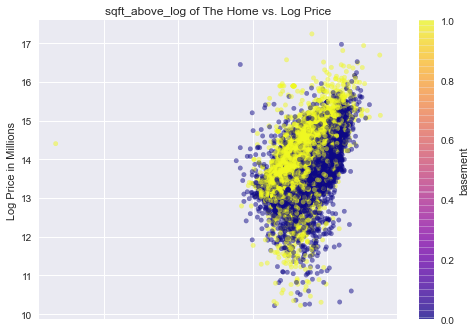

<Figure size 1080x720 with 0 Axes>

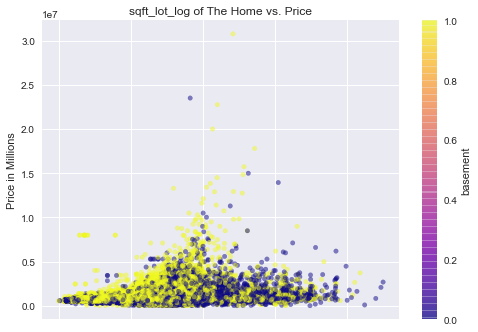

<Figure size 1080x360 with 0 Axes>

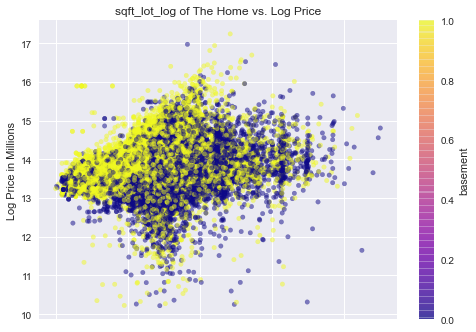

<Figure size 1080x720 with 0 Axes>

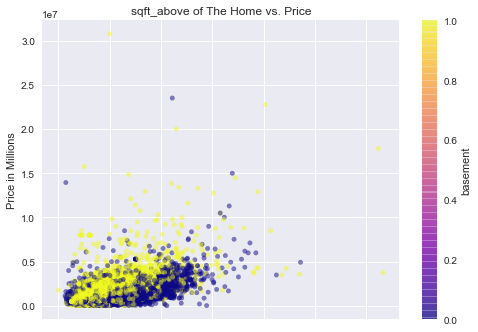

<Figure size 1080x360 with 0 Axes>

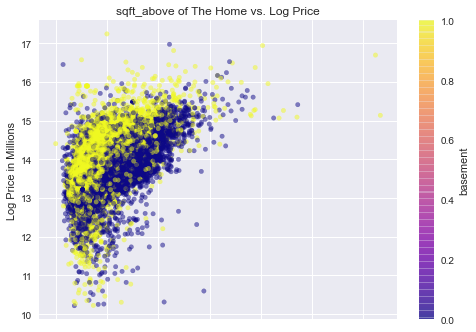

<Figure size 1080x720 with 0 Axes>

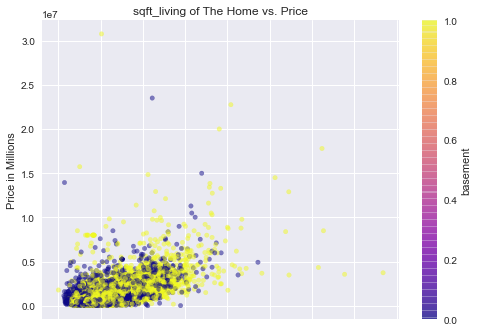

<Figure size 1080x360 with 0 Axes>

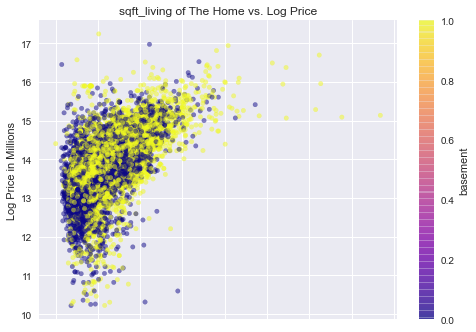

<Figure size 1080x720 with 0 Axes>

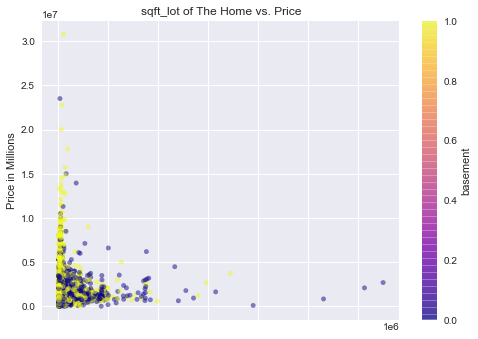

<Figure size 1080x360 with 0 Axes>

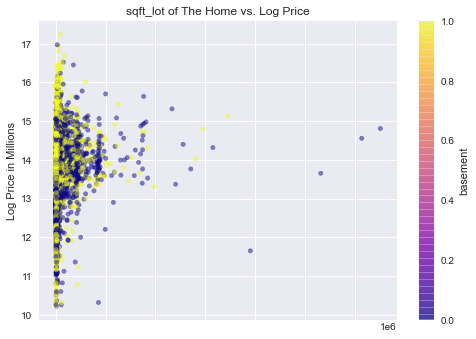

<Figure size 1080x720 with 0 Axes>

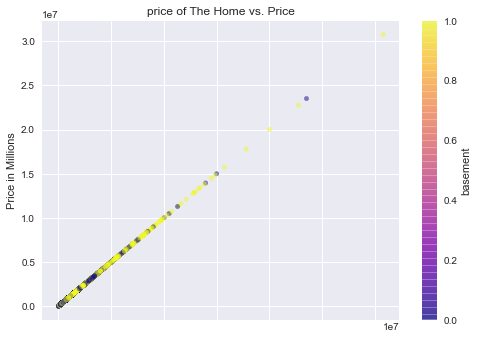

<Figure size 1080x360 with 0 Axes>

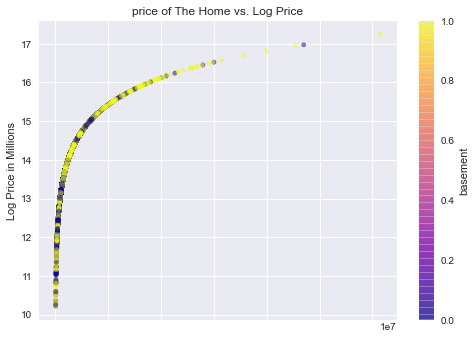

<Figure size 1080x720 with 0 Axes>

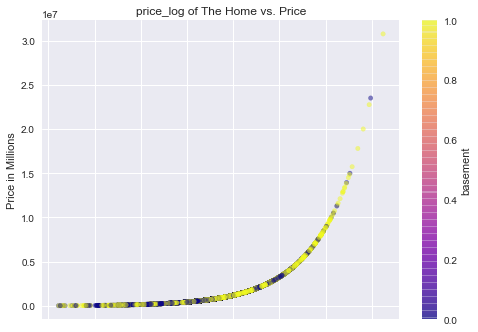

<Figure size 1080x360 with 0 Axes>

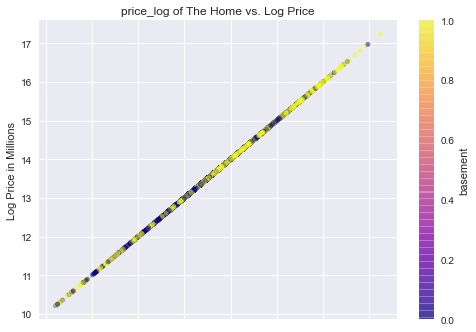

<Figure size 1080x720 with 0 Axes>

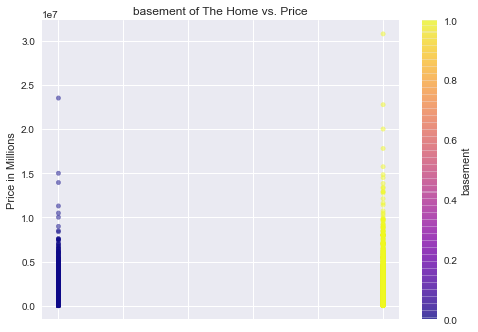

<Figure size 1080x360 with 0 Axes>

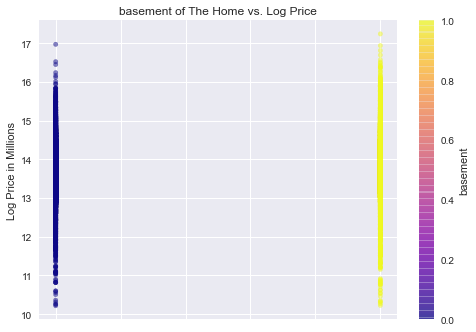

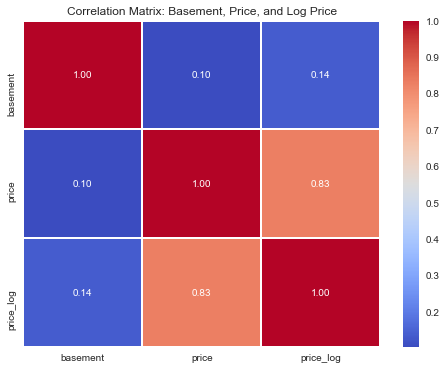

In [46]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "sqft_above", "sqft_living", "sqft_lot"]
price_interations_basement(king, subset)

**Observations:**
1. Overall there seems to be more houses with basements.
2. According to the interaction scatter plots the presence of a basement can increase a home value however it is not a consistent indicator that it would outcompete a home with no basement. This can be seen with the correlations of basement with price, price_log. This suggests there there is some influence that is not being accounted for in a price for a home in King County. 

Second investigation is Garage

In [47]:
# Treat garage as categorical variable
king['garage'] = king['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)

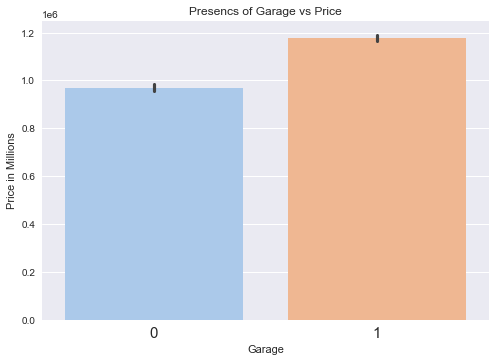

In [48]:
# Make a barplot of basement vs price
sns.barplot(x=king['garage'], 
            y=king['price'],
            palette="pastel",
            )
plt.title("Presencs of Garage vs Price")
plt.xlabel("Garage")
plt.ylabel("Price in Millions")
plt.xticks(fontsize = 15)
plt.show()

In [49]:
def price_interations_garage(data, subset):
    """
    Takes arguments data=dataframe and subset=list of columns to be analyzed in dataframe. 
    The interaction variable is garage.
    """    
    subset = subset + ['price', 'price_log', 'garage']  # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price' vs. sqft_subset_log'
        plt.figure(figsize = (15, 10))
        data.plot.scatter(
            x = col,
            y = 'price',
            c = 'garage',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Price')
        plt.ylabel('Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        data.plot.scatter(
            x = col,
            y = 'price_log',
            c = 'garage',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Log Price')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[['garage', 'price', 'price_log']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix: Basement, Price, and Log Price')
    plt.show()

<Figure size 1080x720 with 0 Axes>

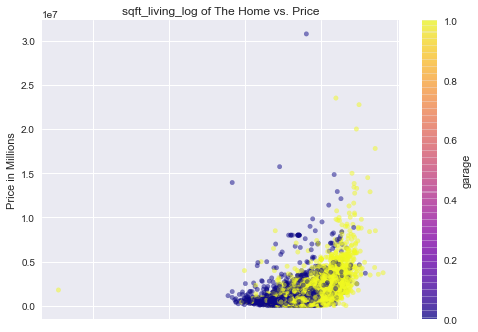

<Figure size 1080x360 with 0 Axes>

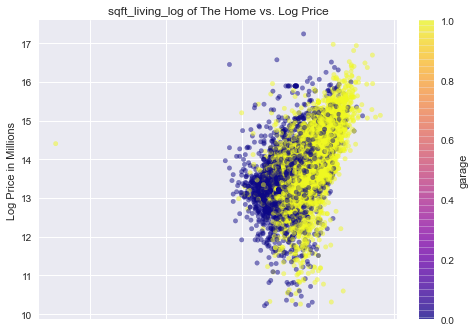

<Figure size 1080x720 with 0 Axes>

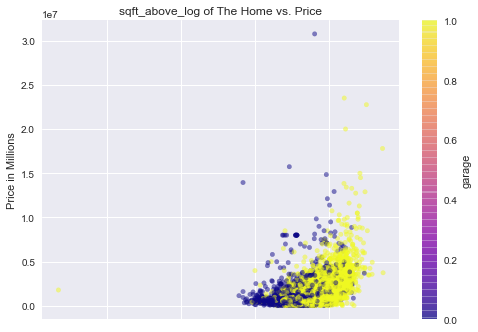

<Figure size 1080x360 with 0 Axes>

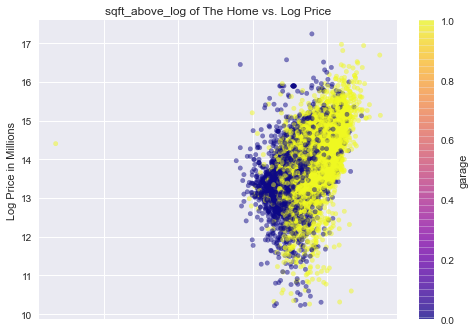

<Figure size 1080x720 with 0 Axes>

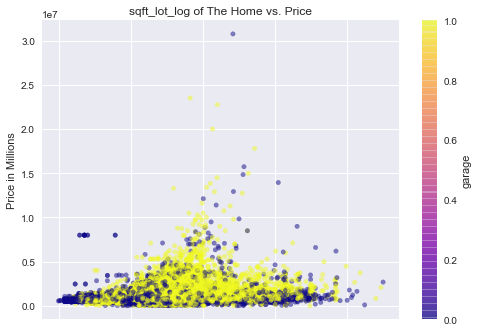

<Figure size 1080x360 with 0 Axes>

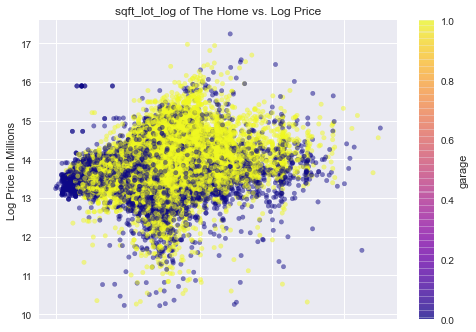

<Figure size 1080x720 with 0 Axes>

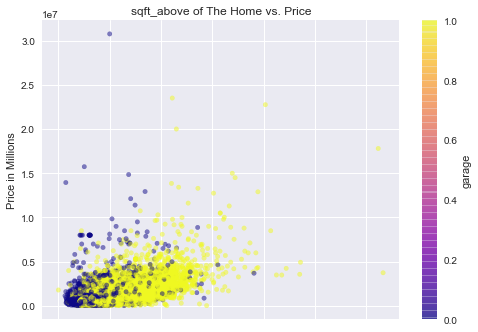

<Figure size 1080x360 with 0 Axes>

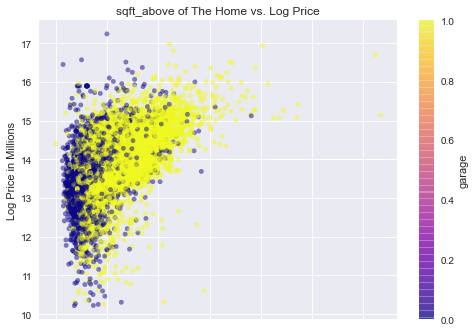

<Figure size 1080x720 with 0 Axes>

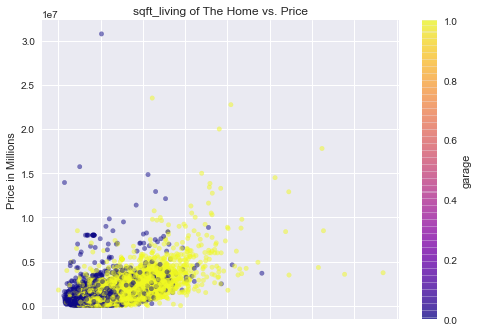

<Figure size 1080x360 with 0 Axes>

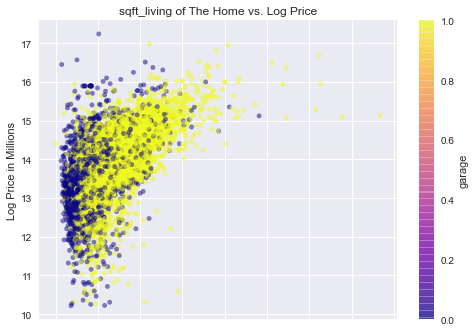

<Figure size 1080x720 with 0 Axes>

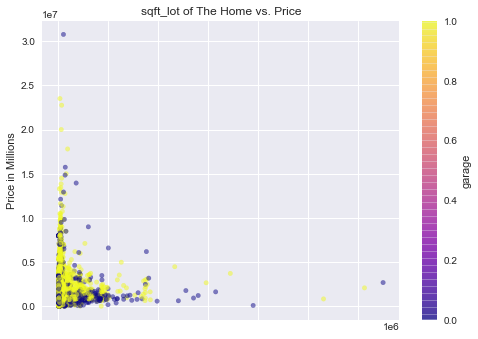

<Figure size 1080x360 with 0 Axes>

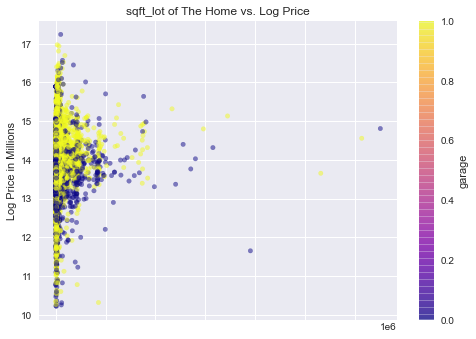

<Figure size 1080x720 with 0 Axes>

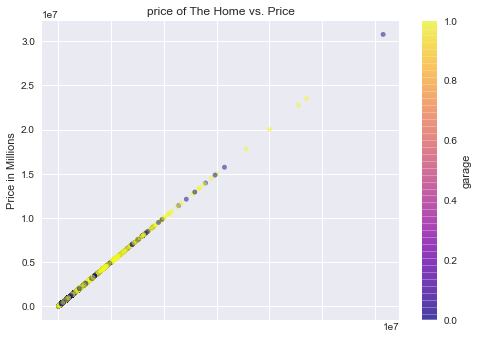

<Figure size 1080x360 with 0 Axes>

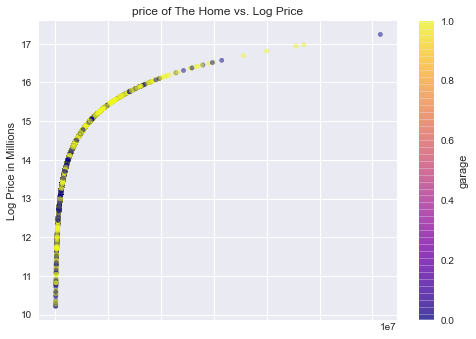

<Figure size 1080x720 with 0 Axes>

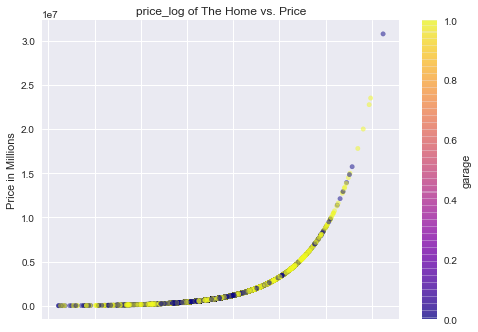

<Figure size 1080x360 with 0 Axes>

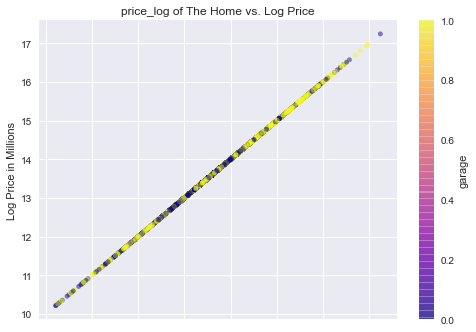

<Figure size 1080x720 with 0 Axes>

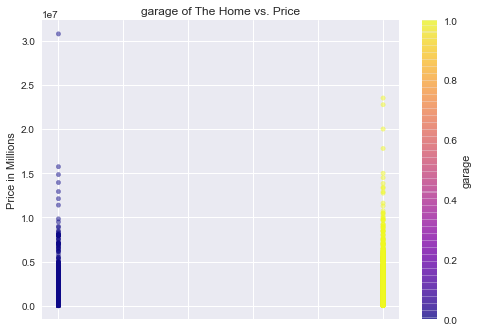

<Figure size 1080x360 with 0 Axes>

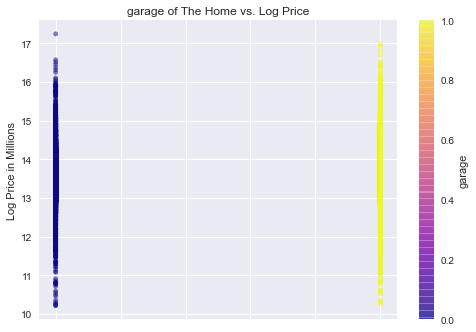

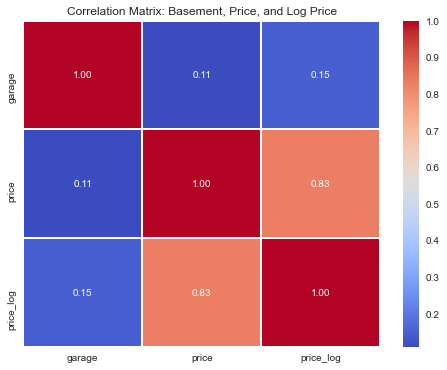

In [50]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "sqft_above", "sqft_living", "sqft_lot"]
price_interations_garage(king, subset)

**Observations:**
1. Overall there seems to be more houses with a garage.
2. According to the interaction scatter plots the presence of a garage can increase a home value however it is not a consistent indicator that it would outcompete a home with no garage. This can be seen with the correlations of garage with price, price_log. This suggests there there is some influence that is not being accounted for in a price for a home in King County. 

## Categorical variables

In [51]:
king.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   
17878 2022-01-03   610000.0         5        2.0         2420     15552   
14450 2022-03-09   700000.0         3        2.0         1720      8620   

       floors waterfront greenbelt nuisance  ...       long  \
21177     1.0         NO        NO       NO  ... -122.21875   
10844     1.5         NO        NO       NO  ... -122.21874   
9292      1.0         NO        NO       NO  ... -122.34868   
17878     1.0         NO        NO       NO  ... -122.24393   
14450     1.5         NO        NO       NO  ... -122.26385   

      extracted_grade_num extracted_class condition_num  price_log  \
21177                   7         Average             4  12.422989   
10844                   7         Average             4  13.319574   
9292                    8            Good             4  13.835313   
17878                   7         Average             3  13.321214   
14450                   7         Average             5  13.458836   

       sqft_living_log  sqft_above_log  sqft_lot_log  basement garage  
21177         7.489971        7.489971     10.591823         0      1  
10844         7.710653        7.710653      9.462343         0      1  
9292          7.922986        7.229839      9.626152         1      0  
17878         7.791523        7.098376      9.651945         1      0  
14450         7.450080        7.450080      9.061840         0      0  

[5 rows x 33 columns]

In [52]:
"""
We need to covert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. 
"""

'\nWe need to covert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. \n'

In [53]:
# Creata a subset of columns needing data replacement 
columns_to_convert = ["greenbelt", "waterfront", "nuisance"]

# Create a dictionary to map 'YES' to 1 and 'NO' to 0
mapping = {'NO': 0, 'YES': 1}

# Iterate through each column in the list and perform the substitution
for col in columns_to_convert:
    king[col] = king[col].astype(str).replace(mapping).astype(int)

In [54]:
for col in columns_to_convert:
    print(king[col].value_counts())

0    29338
1      772
Name: greenbelt, dtype: int64
0    29599
1      511
Name: waterfront, dtype: int64
0    24861
1     5249
Name: nuisance, dtype: int64


Now that we converted our values to zeros and ones we can start viewing relationships between our categorical variables and price.

In [55]:
for col in king.columns:
    print(col)

date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
view
condition
grade
heat_source
sewer_system
sqft_above
sqft_basement
sqft_garage
sqft_patio
yr_built
yr_renovated
address
lat
long
extracted_grade_num
extracted_class
condition_num
price_log
sqft_living_log
sqft_above_log
sqft_lot_log
basement
garage


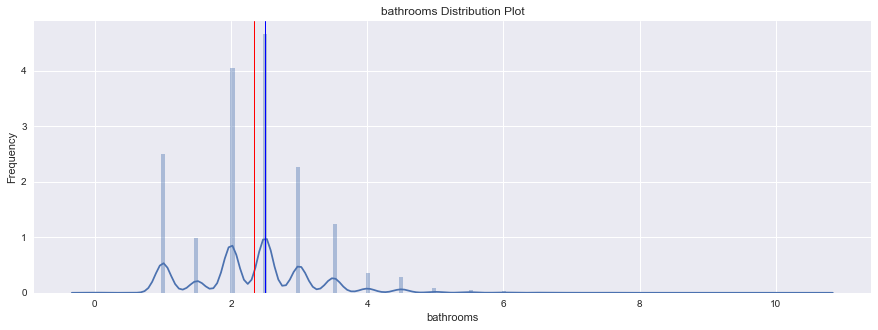

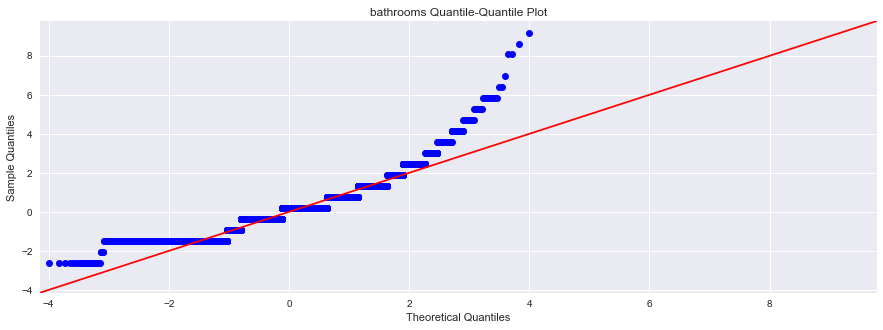

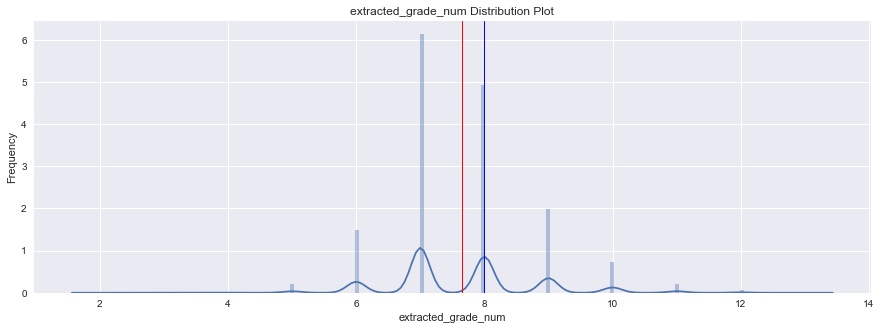

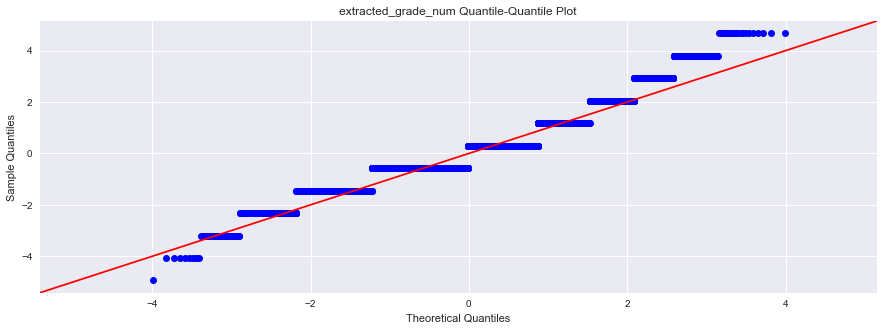

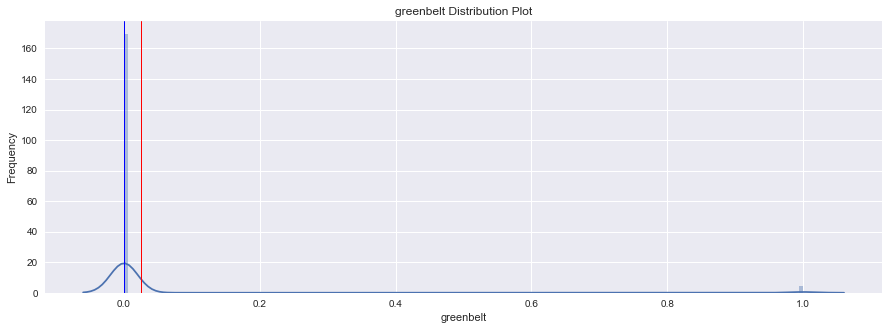

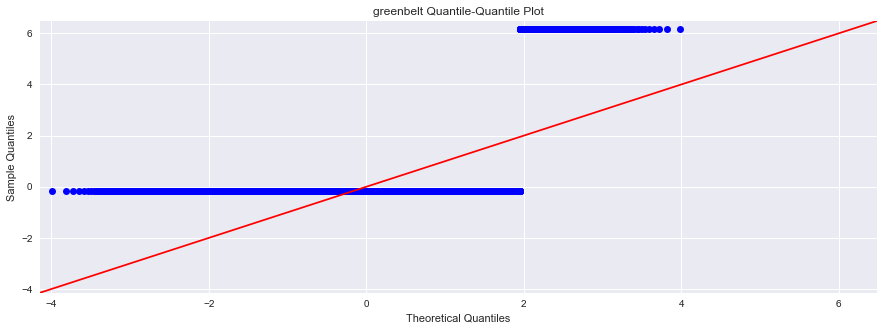

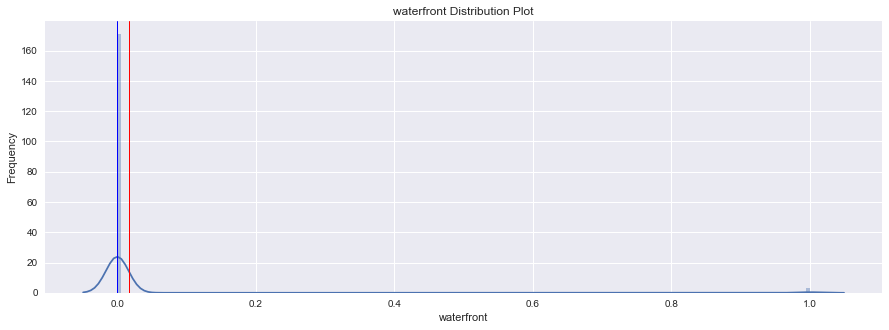

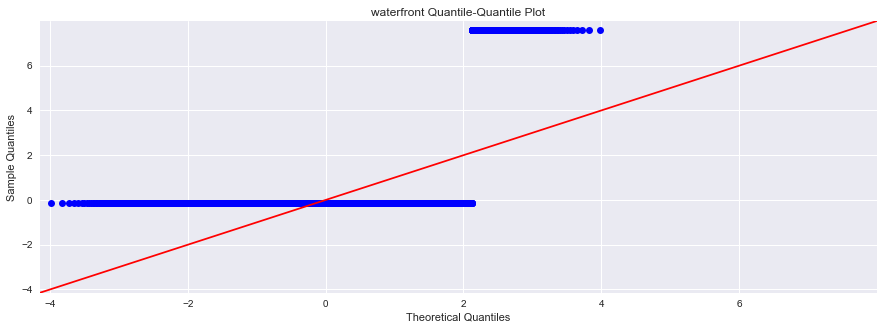

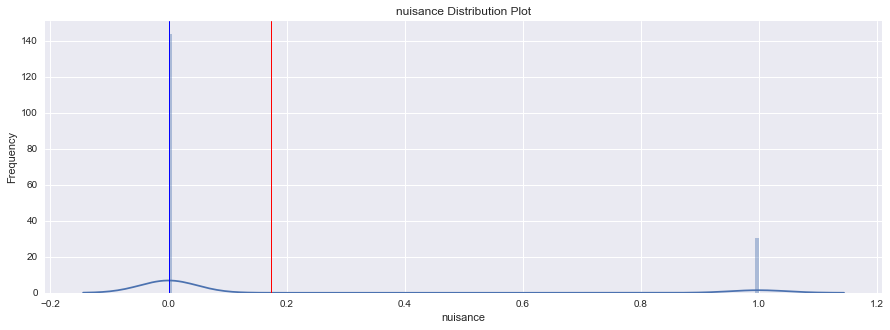

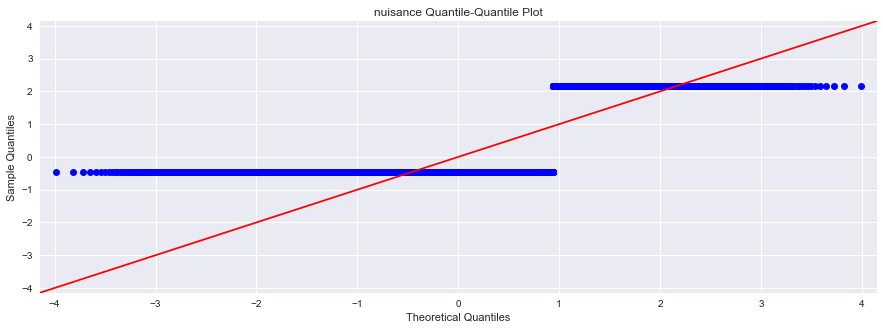

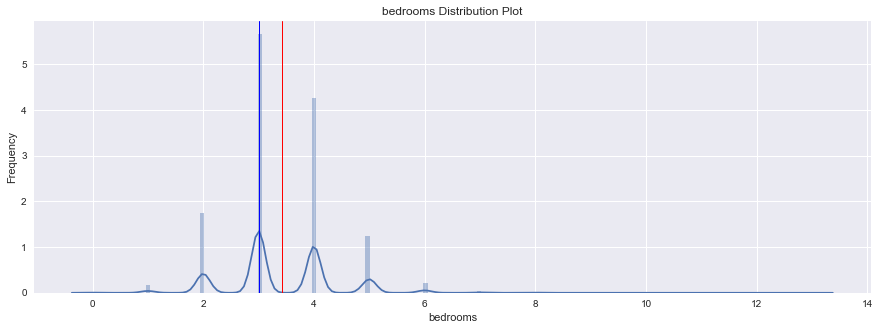

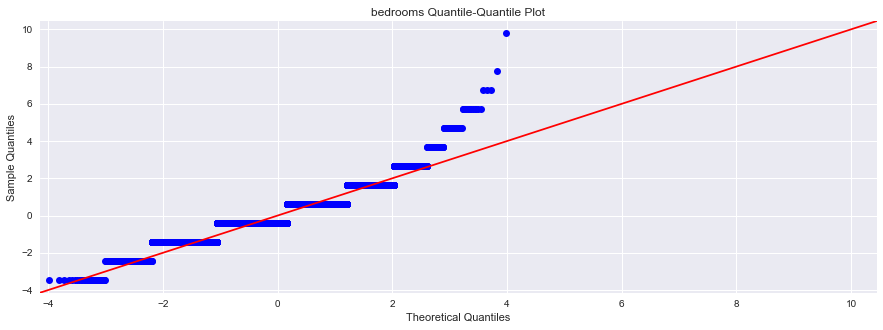

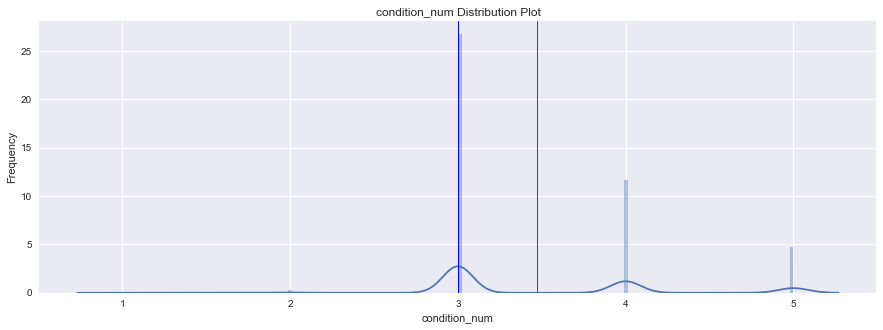

Variable  Skewness   Kurtosis
0            bathrooms  0.750023   2.436508
1  extracted_grade_num  0.654239   1.338626
2            greenbelt  6.002707  34.034755
3           waterfront  7.479740  53.950101
4             nuisance  1.716904   0.947821
5             bedrooms  0.517018   1.916054
6        condition_num  0.884292   0.095475

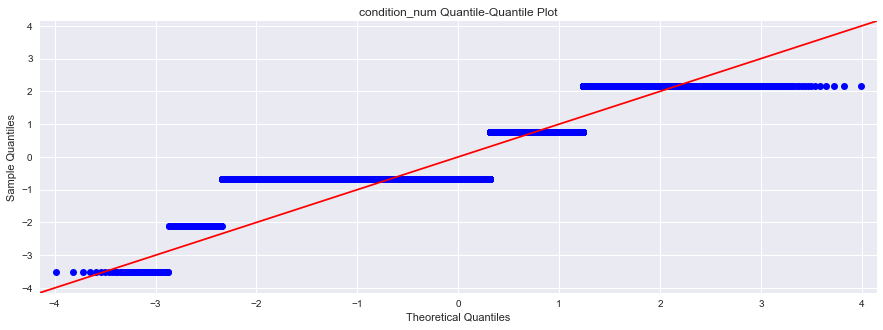

In [56]:
categoricals = ["bathrooms", "extracted_grade_num", "greenbelt", "waterfront", "nuisance", "bedrooms", "condition_num"]
linearity_check(king, categoricals)

**Observations:**
1. Most homes have 3 to 4 bedrooms, 2 to 3 bathrooms, no traffic noise (nuisance), are adjacent to a green belt, are on a waterfront.  

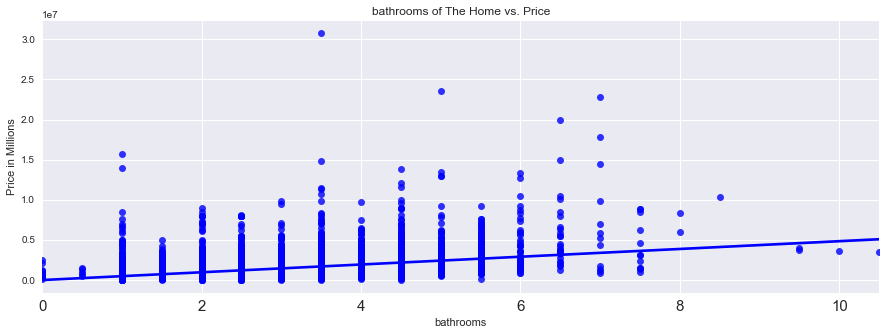

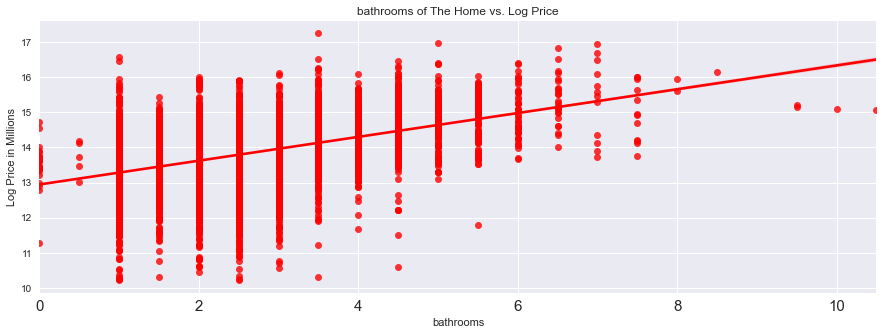

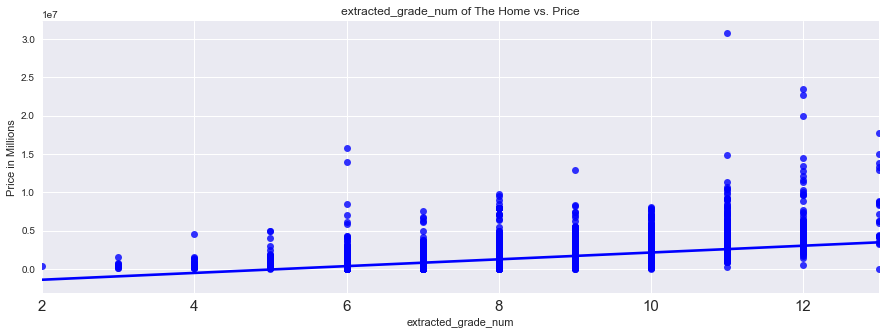

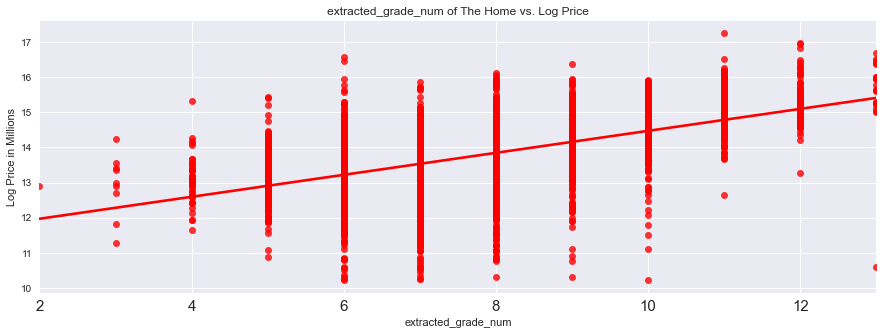

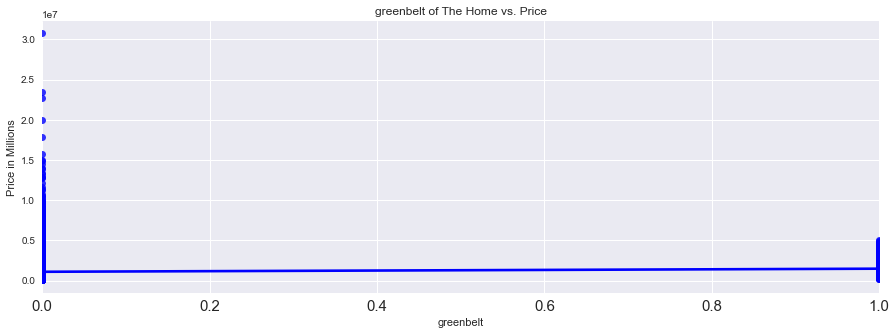

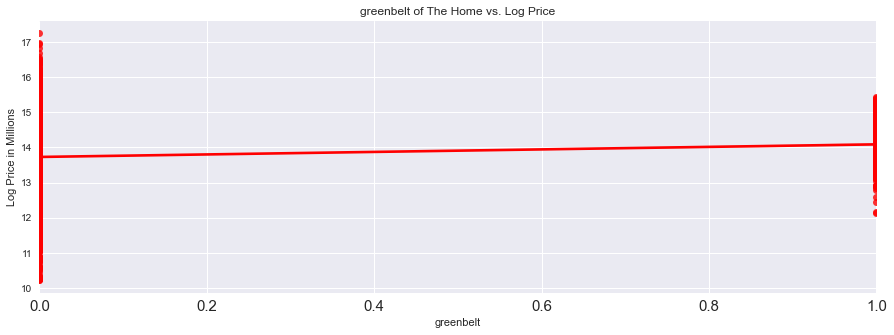

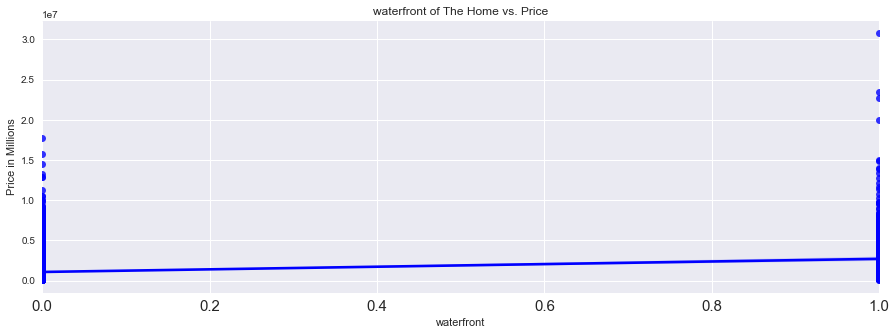

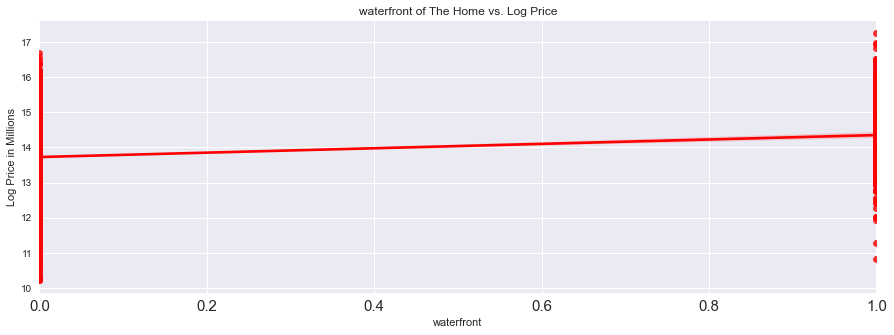

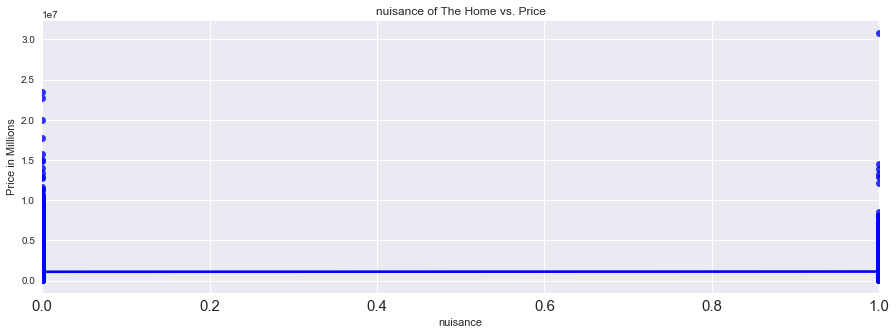

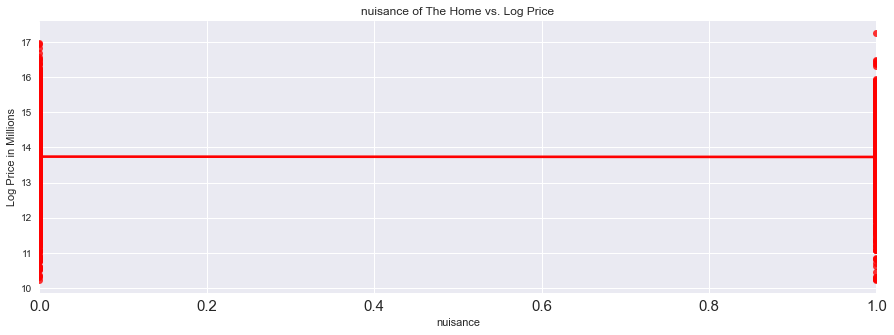

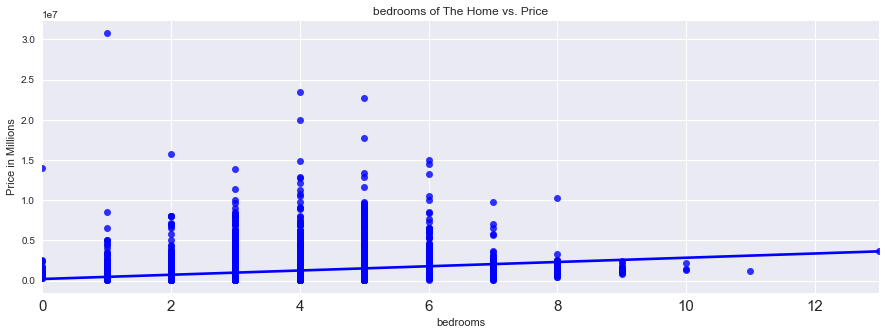

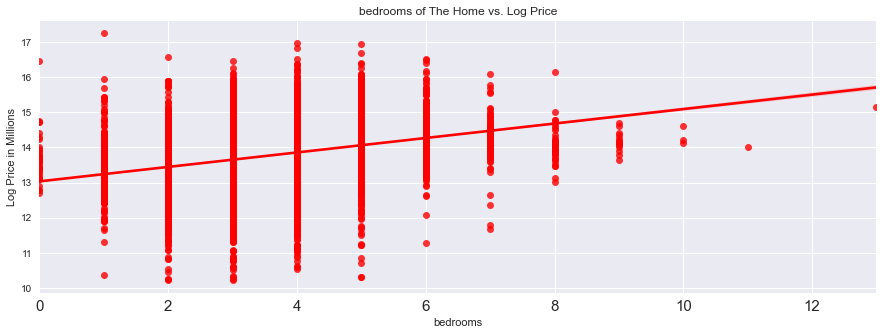

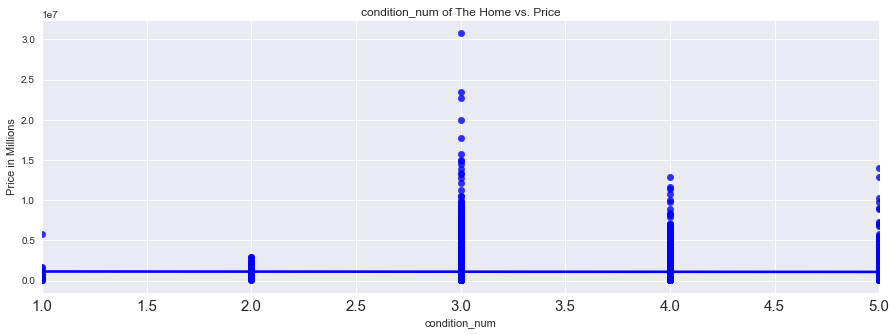

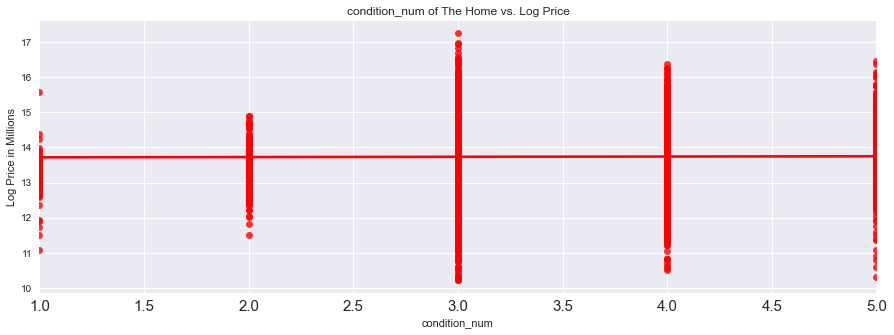

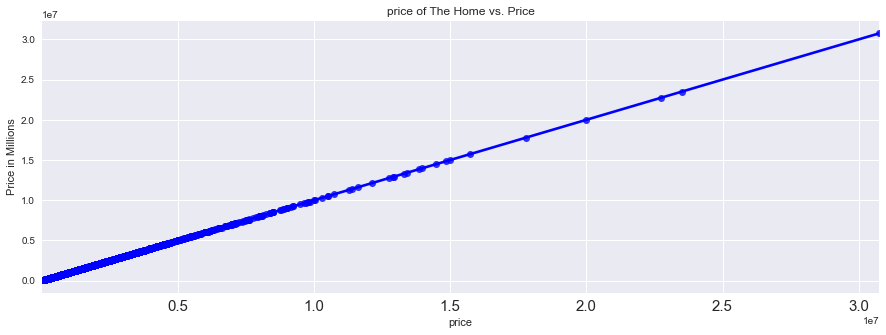

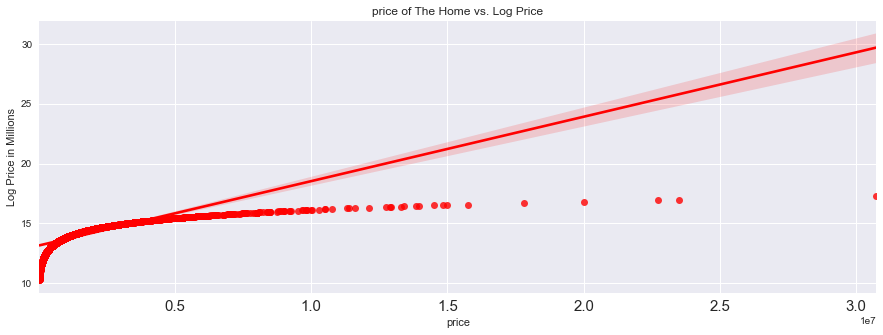

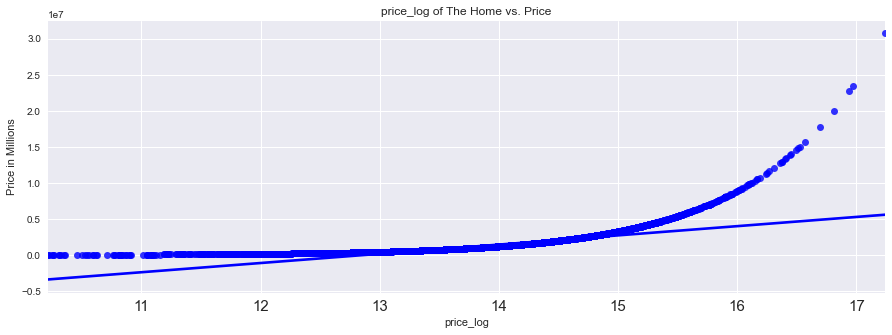

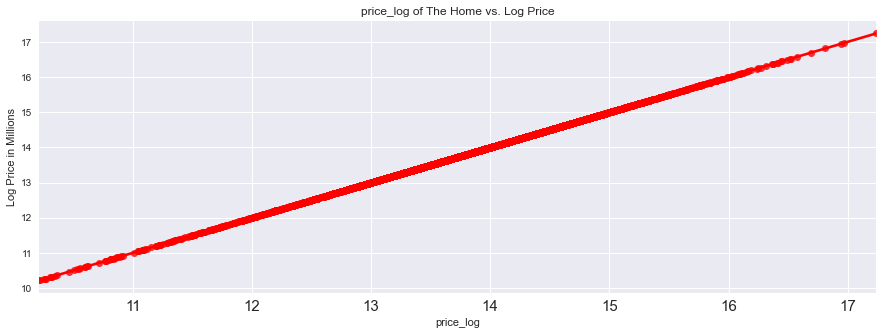

bathrooms  extracted_grade_num  greenbelt  waterfront  \
bathrooms             1.000000             0.647023   0.093886    0.043996   
extracted_grade_num   0.647023             1.000000   0.120098    0.047592   
greenbelt             0.093886             0.120098   1.000000   -0.019687   
waterfront            0.043996             0.047592  -0.019687    1.000000   
nuisance             -0.049902            -0.060768  -0.052937    0.008078   
bedrooms              0.588097             0.371892   0.065296   -0.029701   
condition_num        -0.066573            -0.157484  -0.029221    0.005001   
price                 0.480284             0.566508   0.067948    0.235092   
price_log             0.516526             0.614471   0.097197    0.138611   

                     nuisance  bedrooms  condition_num     price  price_log  
bathrooms           -0.049902  0.588097      -0.066573  0.480284   0.516526  
extracted_grade_num -0.060768  0.371892      -0.157484  0.566508   0.614471  
greenbelt           -0.052937  0.065296      -0.029221  0.067948   0.097197  
waterfront           0.008078 -0.029701       0.005001  0.235092   0.138611  
nuisance             1.000000 -0.049985      -0.021464  0.012212  -0.006281  
bedrooms            -0.049985  1.000000       0.033817  0.288992   0.345930  
condition_num       -0.021464  0.033817       1.000000 -0.009563   0.009101  
price                0.012212  0.288992      -0.009563  1.000000   0.829922  
price_log           -0.006281  0.345930       0.009101  0.829922   1.000000

In [57]:
view_correlation(king, categoricals)

In [58]:
def categorical_bar(data, subset):
    
    import seaborn as sns
    
    for col in subset:
        sns.barplot(x=data[col], 
                    y=data['price'],
                    palette="pastel",
                    )
        plt.title(f"{col} vs Price")
        plt.xlabel(f"{col}")
        plt.ylabel("Price in Millions")
        plt.xticks(fontsize = 10)
        plt.show()
        
        sns.barplot(x=data[col], 
                    y=data['price_log'],
                    palette="bright",
                    )
        plt.title(f"{col} vs Price_log")
        plt.xlabel(f"{col}")
        plt.ylabel("Price_log in Millions")
        plt.xticks(fontsize = 10)
        plt.show()

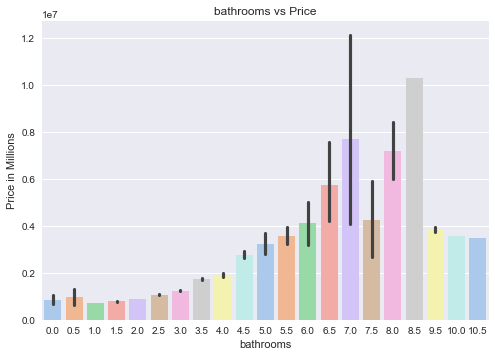

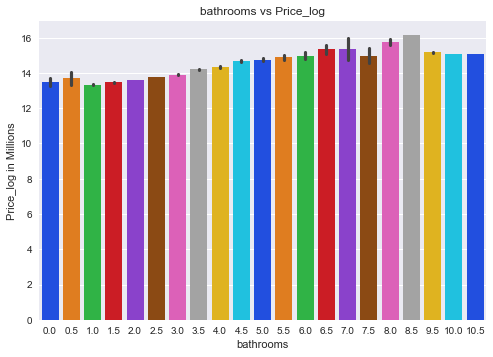

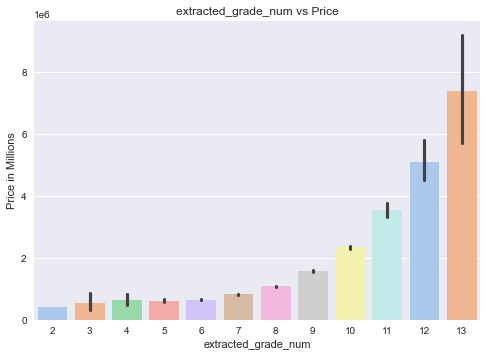

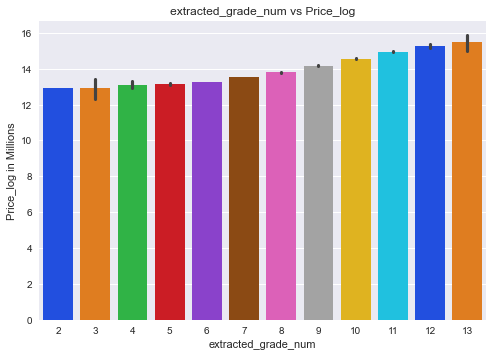

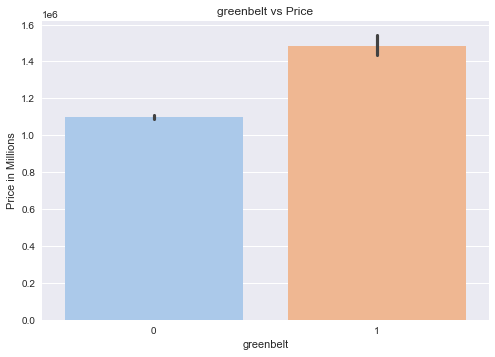

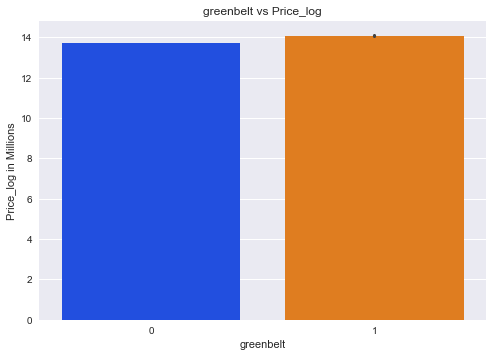

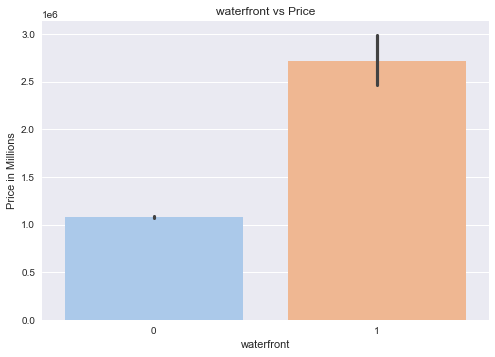

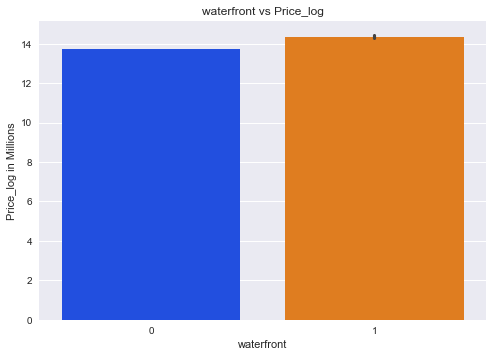

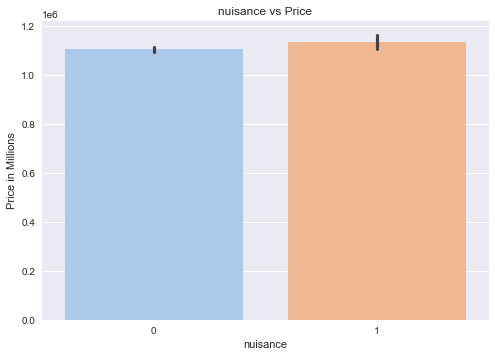

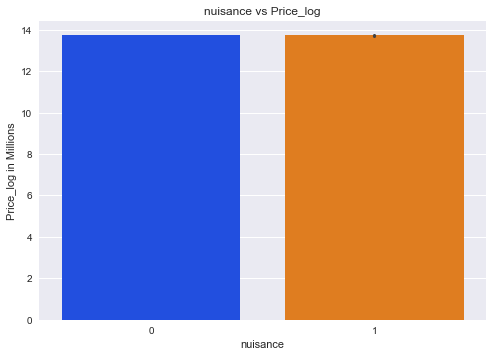

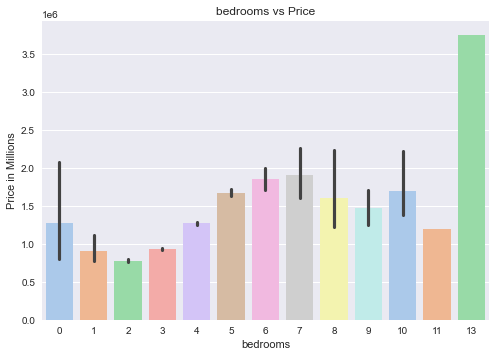

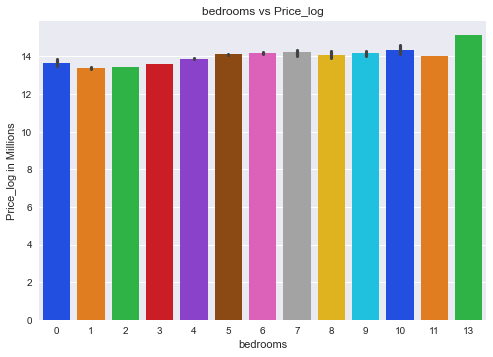

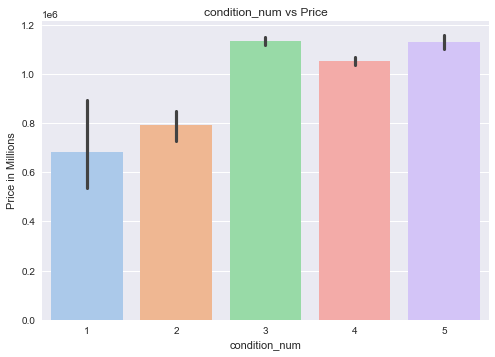

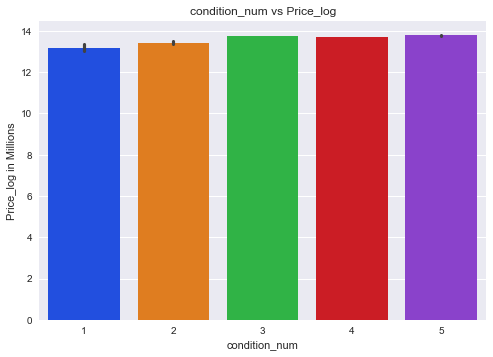

In [59]:
categorical_bar(king, categoricals)

**Observations:**

Bathrooms: 

* Extra bathrooms in a home does contribute to the value of home. This peaks out at around 7 bathrooms. 
* After 7 bathrooms there is a sudden dip in price but then increases dramatically then decreases dramatically. It is not very reliable data beyond seven bathrooms. 
* Price is positively correlated with bathrooms being .51

Grade Number: 
* The quality build of the home does contribute to the value of the home. The price peak is a grade 13 being the best build quality. 
* Price is positively correlated with grade being .61

Green Belt: 
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with green belt. 
* Despite that being true being next a green belt in it seems that its is guarantee that the home would be priced higher in comparison to homes without a green belt

Waterfront:
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with waterfront. 
* Despite that being true being next to a waterfront guarantees that the home would be priced higher in comparison to homes without a waterfront.

Nuisance: 
* It seems that traffic does not do much in terms of impact home value. 

Bedrooms:
* Adding bedrooms to a home does increase its value. This seems to peak at 7 bedrooms. After 7 bedrooms it begins to decrease.

Condition:
* The condition of a home does increase its value. Average(3), Good(4), Very Good(5) are the categories to aim for maximizing home price. Majority of the houses are in condition 3 (average) and these homes perform equally as well as those with condition 4 (good) and condition 5 (very good). 


## Does location matter for homes?

In [60]:
"""
We have two ways to determine a homes location. There is the coordinates and address. 
The address contains the zip code and we already have the price information.
With the coordinates maybe we can attempt to creata a heatmap with the interaction being price. 
"""

'\nWe have two ways to determine a homes location. There is the coordinates and address. \nThe address contains the zip code and we already have the price information.\nWith the coordinates maybe we can attempt to creata a heatmap with the interaction being price. \n'

In [61]:
print(king.columns)

king['address'].head(5)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'extracted_grade_num', 'extracted_class',
       'condition_num', 'price_log', 'sqft_living_log', 'sqft_above_log',
       'sqft_lot_log', 'basement', 'garage'],
      dtype='object')


21177    1526 I Street Northeast, Auburn, Washington 98...
10844    1412 I Street Northeast, Auburn, Washington 98...
9292     1104 Southwest Shorebrook Drive, Normandy Park...
17878    7205 South 133rd Street, Seattle, Washington 9...
14450    5610 South 141st Street, Tukwila, Washington 9...
Name: address, dtype: object

In [62]:
# We need to extract the zipcode and an example of an address is this
king['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [63]:
# All the addresses follow the same format. #### street, city, state zipcode, country

# Extract the numbers using a regular expression and store it in a new column 'zipcode'
# , matches the comma in the address.
# \s* matches any number of spaces after the comma (optional spaces).
# (\d{5}) captures the five-digit number (the zip code).
# , matches the comma after the zip code.
# \s* matches any number of spaces after the comma (optional spaces).
# \w+ matches one or more word characters (representing the state name).
king['zipcode'] = king['address'].str.extract(r',\s*\w+\s*(\d{5}),')

# Print the DataFrame with the extracted numbers
print(king[['address', 'zipcode']])

# Print the DataFrame with the extracted zip code to check them
print(king[['address', 'zipcode']])


                                                 address zipcode
21177  1526 I Street Northeast, Auburn, Washington 98...   98002
10844  1412 I Street Northeast, Auburn, Washington 98...   98002
9292   1104 Southwest Shorebrook Drive, Normandy Park...   98166
17878  7205 South 133rd Street, Seattle, Washington 9...   98178
14450  5610 South 141st Street, Tukwila, Washington 9...   98168
...                                                  ...     ...
26982  1220 Southwest 149th Street, Burien, Washingto...   98166
29172  1255 Southwest 150th Street, Burien, Washingto...   98166
22523  1249 Southwest 150th Street, Burien, Washingto...   98166
18938  1412 Southwest 152nd Street, Burien, Washingto...   98166
26110  11740 24th Avenue Northeast, Seattle, Washingt...   98125

[30110 rows x 2 columns]
                                                 address zipcode
21177  1526 I Street Northeast, Auburn, Washington 98...   98002
10844  1412 I Street Northeast, Auburn, Washington 98...   98002

In [64]:
print(king['zipcode'].value_counts())

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
02645      1
94122      1
62281      1
85207      1
47060      1
Name: zipcode, Length: 334, dtype: int64


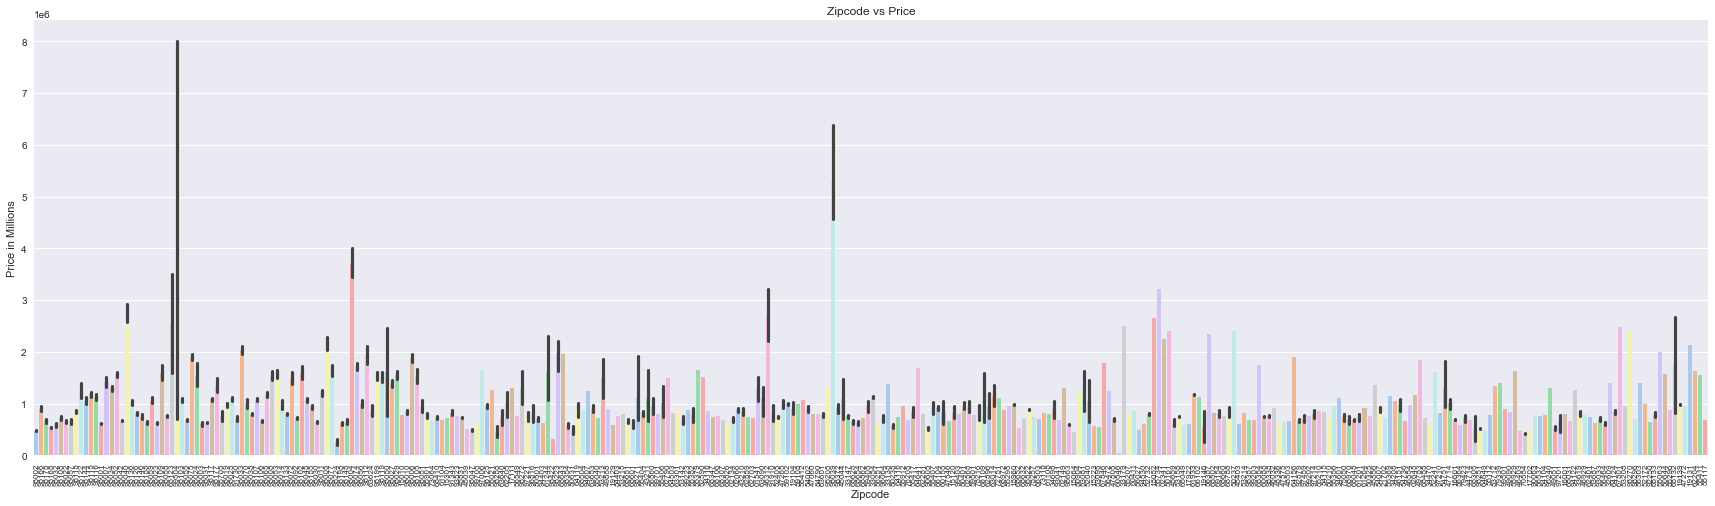

In [65]:
# plot barplot of zipcode vs price
plt.figure(figsize=(30,8))
sns.barplot(x=king['zipcode'], y=king['price'], palette="pastel")
plt.title('Zipcode vs Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 8, rotation = 90)
plt.show()

It is clear that there are way to many zipcodes in this dataset however there are areas that show that a homes location matters in King County. Instead of using zipcode we can use the cities. The thing is I am not sure where I can retrieve a dictionary that tells me the city according to the zipcode so instead we can extract the zity from the address. 

In [66]:
# All the addresses follow the same format. #### street, city, state zipcode, country
# Extract the city using a regular expression and store it in a new column 'city'
king['city'] = king['address'].apply(lambda x: x.split(',')[1].strip())

# Print the DataFrame with the extracted cuty
print(king[['address', 'city']])


                                                 address           city
21177  1526 I Street Northeast, Auburn, Washington 98...         Auburn
10844  1412 I Street Northeast, Auburn, Washington 98...         Auburn
9292   1104 Southwest Shorebrook Drive, Normandy Park...  Normandy Park
17878  7205 South 133rd Street, Seattle, Washington 9...        Seattle
14450  5610 South 141st Street, Tukwila, Washington 9...        Tukwila
...                                                  ...            ...
26982  1220 Southwest 149th Street, Burien, Washingto...         Burien
29172  1255 Southwest 150th Street, Burien, Washingto...         Burien
22523  1249 Southwest 150th Street, Burien, Washingto...         Burien
18938  1412 Southwest 152nd Street, Burien, Washingto...         Burien
26110  11740 24th Avenue Northeast, Seattle, Washingt...        Seattle

[30110 rows x 2 columns]


In [67]:
king['city'].describe()

count       30110
unique        323
top       Seattle
freq         9363
Name: city, dtype: object

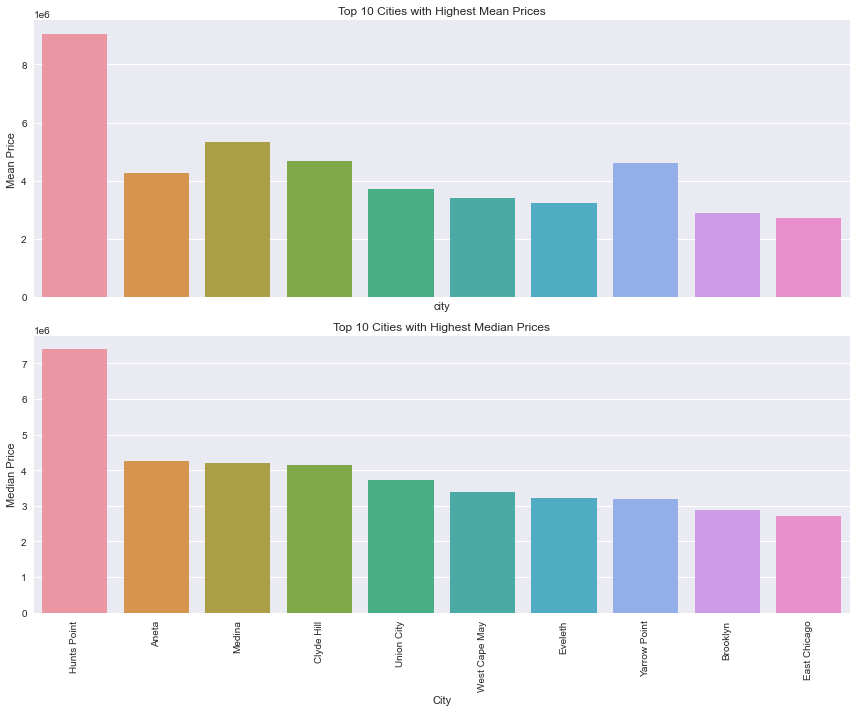

In [68]:
# Calculate the mean price for every city
mean_price_by_city = king.groupby('city')['price'].mean().reset_index()

# Calculate the median price for every city
median_price_by_city = king.groupby('city')['price'].median().reset_index()

# Merge mean and median price DataFrames based on the 'city' column
merged_prices = pd.merge(mean_price_by_city, median_price_by_city, on='city', suffixes=('_mean', '_median'))

# Sort the DataFrame in descending order based on the 'price_mean' column
sorted_prices = merged_prices.sort_values(by='price_median', ascending=False)

# Extract the top N cities with the highest mean prices (e.g., top 10 cities)
N = 10
top_cities_highest_prices = sorted_prices.head(N)

# Create a multi-panel plot for mean and median prices
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot mean prices
sns.barplot(x='city', y='price_mean', data=top_cities_highest_prices, ax=ax1)
ax1.set_ylabel('Mean Price')
ax1.set_title(f'Top {N} Cities with Highest Mean Prices')

# Plot median prices
sns.barplot(x='city', y='price_median', data=top_cities_highest_prices, ax=ax2)
ax2.set_xlabel('City')
ax2.set_ylabel('Median Price')
ax2.set_title(f'Top {N} Cities with Highest Median Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

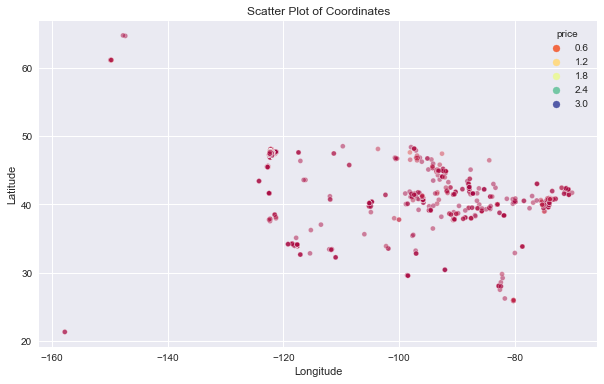

In [69]:
# Create a scatter plot for latitude and longitude values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', data=king, alpha=0.5, s = 25, palette='Spectral')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Coordinates')
plt.show()


**Observations:**
1. Determined that Hunts Point has the highest value homes. It seems location does matter to a degree. 
2. lat and long scatter worked however I don't beleive it worked correctly. There is either not enough data or something is wrong it.

## Start Preparation for Creating Models


The first thing to do is to clean up the dataframe then check for any multicollinarity issues

In [70]:
king.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'extracted_grade_num', 'extracted_class',
       'condition_num', 'price_log', 'sqft_living_log', 'sqft_above_log',
       'sqft_lot_log', 'basement', 'garage', 'zipcode', 'city'],
      dtype='object')

In [71]:
"""
We do not need date, nuisance, view, heat_source, sewer_system, yr_built, 'yr_renovated', 'address', 'extracted_class', 'condition'
"""

"\nWe do not need date, nuisance, view, heat_source, sewer_system, yr_built, 'yr_renovated', 'address', 'extracted_class', 'condition'\n"

In [72]:
subset = ['date', 'nuisance', 'view', 'heat_source', 'sewer_system', 'yr_built', 'yr_renovated', 'address', 'extracted_class', 'condition']
king.drop(labels=subset, axis=1, inplace=True)

In [73]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=king.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [74]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                      
(sqft_above, sqft_above_log)       0.954400
(sqft_living, sqft_living_log)     0.946600
(sqft_above, sqft_living)          0.883732
(sqft_living_log, sqft_above_log)  0.874526
(sqft_above_log, sqft_living)      0.843373
(basement, sqft_basement)          0.842972
(sqft_above, sqft_living_log)      0.833664
(price, price_log)                 0.829922
(garage, sqft_garage)              0.814262
(bathrooms, sqft_living)           0.772209
(sqft_living_log, bathrooms)       0.762857
(lat, long)                        0.760532

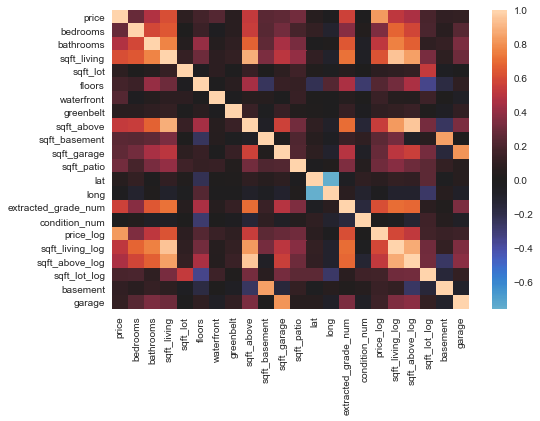

In [75]:
sns.heatmap(king.corr(), center=0);

In [78]:
# compare continuous feature correlations with 'price'
# determine which variables actually do not matter for a model with target variable price
king[['sqft_living', 'sqft_above','sqft_basement', 'bathrooms', 'price']].corr()

sqft_living  sqft_above  sqft_basement  bathrooms     price
sqft_living       1.000000    0.883732       0.338337   0.772209  0.608586
sqft_above        0.883732    1.000000      -0.067357   0.674231  0.538614
sqft_basement     0.338337   -0.067357       1.000000   0.260611  0.244938
bathrooms         0.772209    0.674231       0.260611   1.000000  0.480284
price             0.608586    0.538614       0.244938   0.480284  1.000000

Overall correlation between .75 and less than 1 is an indication of multicollinearity. Lets now view each of the features in correlation to price. Lets view log features and normal features seperately. We will have to determine which variables to drop from each set to avoid multicollinearity.

**Observations:**
* There are many pairs that are highly correlated. 
* The non-log pairs are as follows:
> 1. (sqft_above, sqft_living) = 0.883732
> 2. (basement, sqft_basement) = 0.842972
> 3. (garage, sqft_garage) = 0.814262
> 4. (bathrooms, sqft_living) = 0.772209
> 5. (lat, long) = 0.760532
* Based off these non-log pairs sqft_living appears twice. We should drop this variable from that dataframe. We can't drop sqft_above because this in theory is makes up for sqft_living since the living room is in the same square footage and sqft_above. 
* The log pairs are as follows:
> 1. (sqft_above, sqft_above_log) = 0.954400
> 2. (sqft_living, sqft_living_log) = 0.946600
> 3. (sqft_living_log, sqft_above_log) = 0.874526
> 4. (sqft_above_log, sqft_living) = 0.843373
> 5. (sqft_above, sqft_living_log) = 0.833664
> 6. (price, price_log) = 0.829922
> 7. (sqft_living_log, bathrooms) = 0.762857
* Based off these log pairs we should drop living_log since this appeared 4 times. 
* Another thing to consider are variables that just don't correlate well with price. low correlating features are not good for a model We can see from the correlation matrix that sqft_basement has a very low correlation 

In [82]:
# drop features 
king.drop(labels=["sqft_living", "sqft_living_log"], axis=1, inplace=True)

In [83]:
king.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'greenbelt', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'lat', 'long', 'extracted_grade_num', 'condition_num',
       'price_log', 'sqft_above_log', 'sqft_lot_log', 'basement', 'garage',
       'zipcode', 'city'],
      dtype='object')

Now that we got rid of multicollinearity issues we need to convert our categorical variables into usable variables for our model by using the dummies method. So far we have this ...

In [86]:
king_continuous = king[['price', 'price_log', 'sqft_lot', 'sqft_lot_log', 'sqft_basement', 'sqft_above', 'sqft_above_log', 'sqft_garage', 'sqft_patio']]
# Ordinal is like categorical however there is a distinction between catergories and you can rank them. This would suggest that it would not require one hot encoding.
king_ordinals = king[['bedrooms', 'bathrooms', 'floors', 'condition_num', 'extracted_grade_num']]
king_categoricals = king[['waterfront', 'greenbelt', 'basement', 'garage', 'city']]

## Prepare Categorical Data with One Hot Encoding

In [87]:
# Make sure all data types are strings first
king['waterfront'] = king['waterfront'].astype('str')
king['greenbelt'] = king['greenbelt'].astype('str')
king['basement'] = king['basement'].astype('float64').astype('str')
king['garage'] = king['garage'].astype('float64').astype('str')
king['city'] = king['city'].astype('str')

In [88]:
# Creat the dummy variables
waterfront_dummies = pd.get_dummies(king['waterfront'], prefix='waterfront', drop_first=True)
greenbelt_dummies = pd.get_dummies(king['greenbelt'], prefix='greenbelt', drop_first=True)
basement_dummies = pd.get_dummies(king['basement'], prefix='basement', drop_first=True)
garage_dummies = pd.get_dummies(king['garage'], prefix='garage', drop_first=True)
city_dummies = pd.get_dummies(king['city'], prefix='city', drop_first=True)

Create a clean dataframe that can be used for modeling.

In [92]:
# Merge dummies, categoricals, and continuous columns
clean_df = pd.concat([king_continuous, king_ordinals, king_categoricals, waterfront_dummies, greenbelt_dummies, basement_dummies, garage_dummies, city_dummies], axis=1)

In [93]:
clean_df.head()

price  price_log  sqft_lot  sqft_lot_log  sqft_basement  \
21177   248448.0  12.422989     39808     10.591823              0   
10844   609000.0  13.319574     12866      9.462343              0   
9292   1020000.0  13.835313     15156      9.626152           1380   
17878   610000.0  13.321214     15552      9.651945           1210   
14450   700000.0  13.458836      8620      9.061840              0   

       sqft_above  sqft_above_log  sqft_garage  sqft_patio  bedrooms  ...  \
21177        1790        7.489971          460         290         3  ...   
10844        2232        7.710653          440          60         4  ...   
9292         1380        7.229839            0           0         5  ...   
17878        1210        7.098376            0         330         5  ...   
14450        1720        7.450080            0           0         3  ...   

       city_West Tisbury  city_Westport  city_White Center  city_Whitehall  \
21177                  0              0                  0               0   
10844                  0              0                  0               0   
9292                   0              0                  0               0   
17878                  0              0                  0               0   
14450                  0              0                  0               0   

       city_Whittier  city_Williston  city_Woodbury  city_Woodinville  \
21177              0               0              0                 0   
10844              0               0              0                 0   
9292               0               0              0                 0   
17878              0               0              0                 0   
14450              0               0              0                 0   

      city_Yaphank  city_Yarrow Point  
21177            0                  0  
10844            0                  0  
9292             0                  0  
17878            0                  0  
14450            0                  0  

[5 rows x 345 columns]

In [94]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=clean_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [96]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                  
(sqft_above, sqft_above_log)   0.954400
(basement_1.0, sqft_basement)  0.842972
(price_log, price)             0.829922
(sqft_garage, garage_1.0)      0.814262

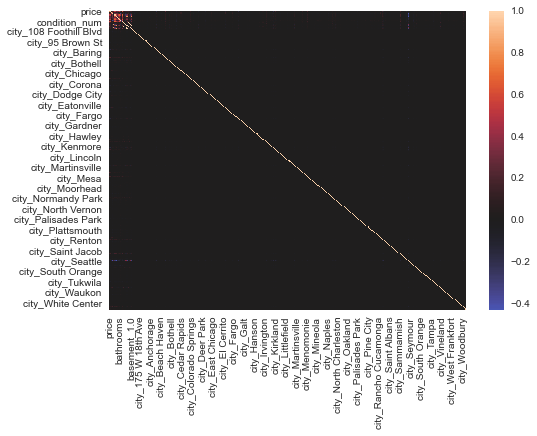

In [95]:
sns.heatmap(clean_df.corr(), center=0);

In [97]:
# save dataframe as csv
clean_df.to_csv('../data/clean_df.csv')